
# <p style="text-align: center;">MIS382: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 3</p>
## <p style="text-align: center;">Total points: 75</p>
## <p style="text-align: center;">Due: Tuesday, October 22nd, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Your partner needs to be from the same section. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Please ensure that the notebook you have uploaded on Canvas is the correct one, you could download the notebook from Canvas to double check that you have submitted the correct version on your notebook.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1 - Stochastic Gradient Descent (30 pts)

1. (5pts) Using stochastic gradient descent, derive the coefficent updates for all 5 coefficients of the model: $$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3x_1^2x_2^2 + w_4x_2^3$$ Hint: start from the cost function (Assume sum of squared error). If you write the math by hand, include the image in your notebook and upload the image in the submission.


2. (20pts) Write Python code for an SGD solution to the non-linear model$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3x_1^2x_2^2 + w_4x_2^3$$ Try to format similarly to scikit-learn's models. The template of the class is given. The init function of the class takes as input the learning_rate, regularization_constant and number of epochs. The fit method must take as input X,y and a choice of update_rule as 'sgd' or 'sgd_momentum' or 'Adagrad'. The _predict_ method takes an X value (optionally, an array of values). Use your new gradient descent regression to predict the data given in 'samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100] . Plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) for the best 2 combinations of learning_rate and regularization for SGD, SGD-Momentum and Adagrad. I.e., you should have one plot of MSE and another for the parameter updates for SGD, SGD-Momentum and Adagrad (6 plots total). (2pts) Report the MSE at the end of 15 epochs for the two best combinations in each of SGD, SGD-Momentum and Adagrad.

Here are two blogs which you can go through to know about Adagrad - [blog 1](https://medium.com/konvergen/an-introduction-to-adagrad-f130ae871827) and [blog 2](http://ruder.io/optimizing-gradient-descent/).


3. (5pts) Based on the experiments, which of the 3 techniques allowed for a larger initial setting of the learning_rate? Why?


## Answer 

In [64]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 1. Weight update term derivation

Answer: 

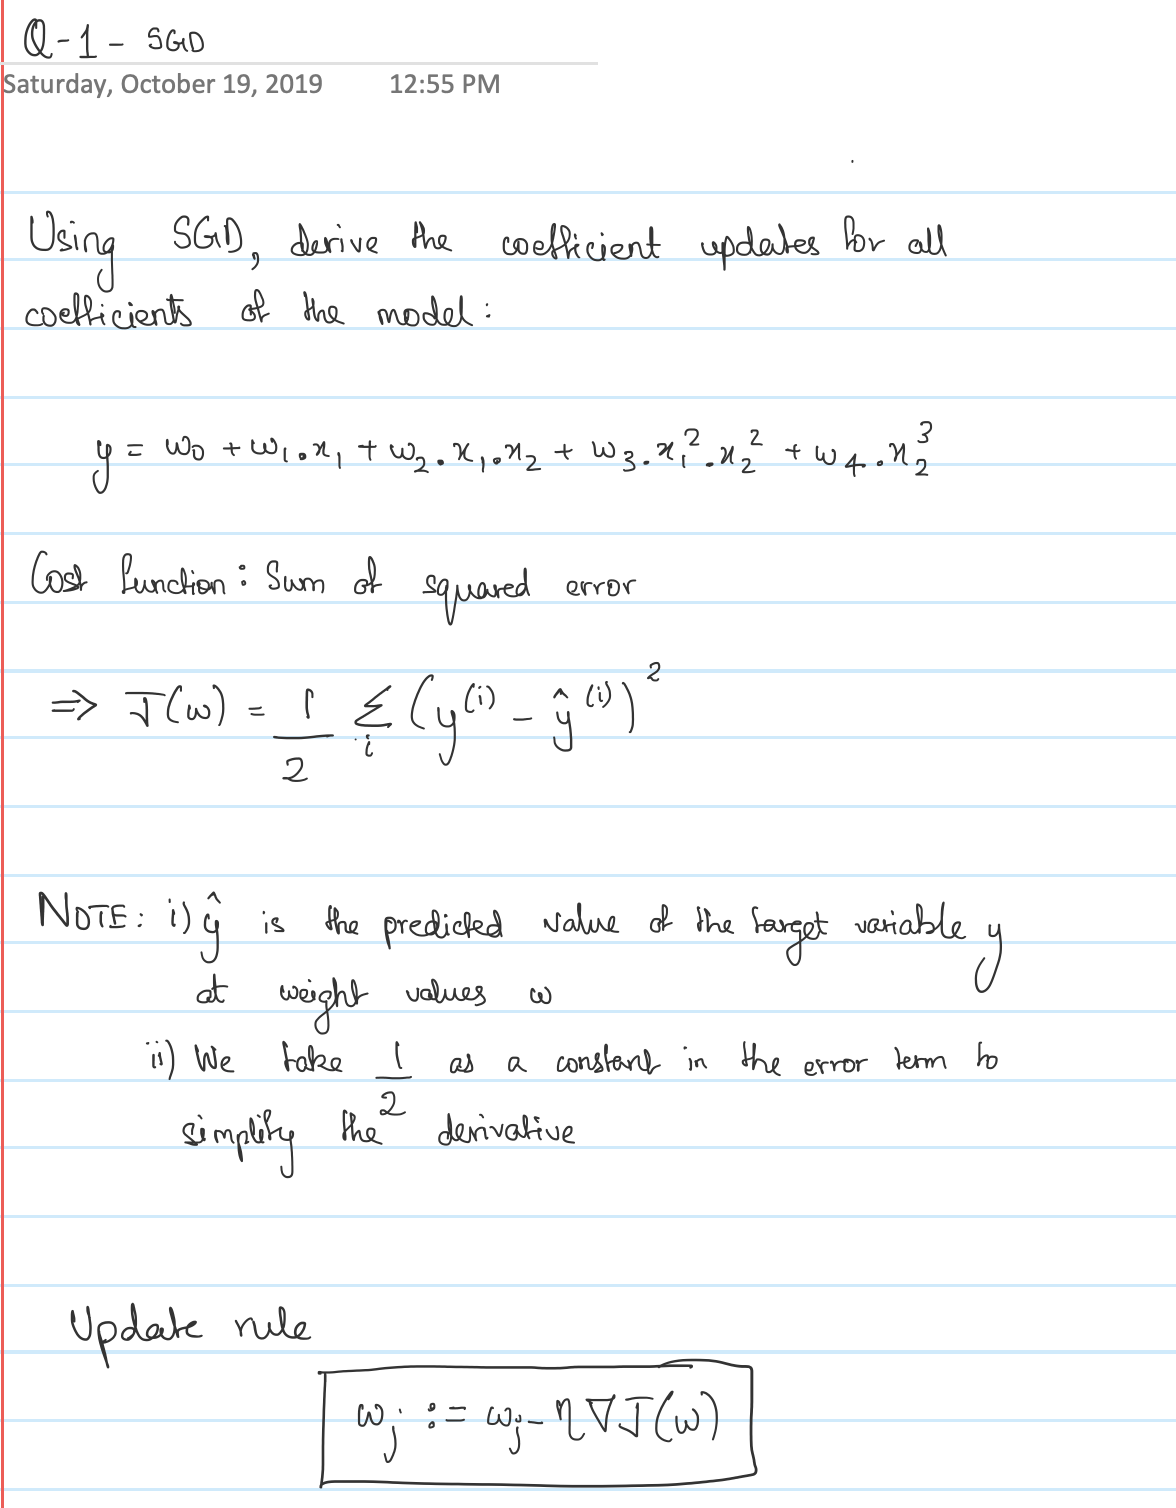
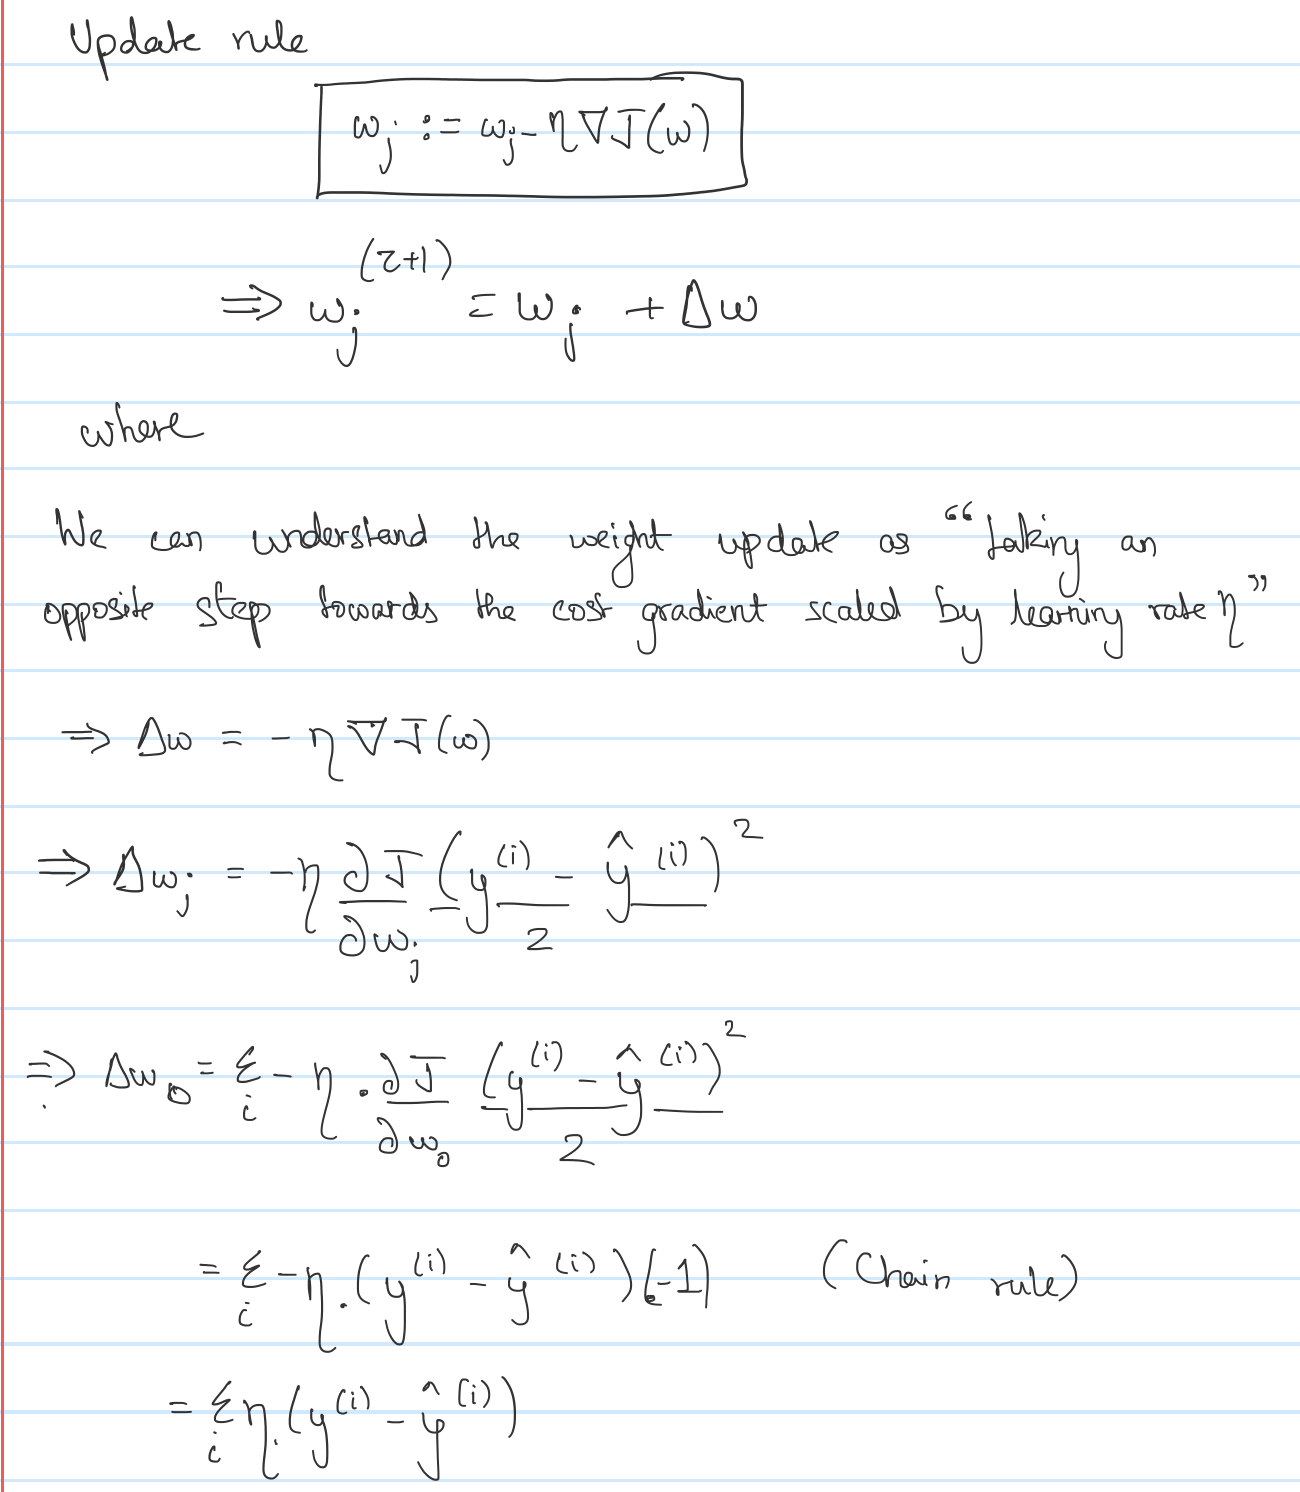
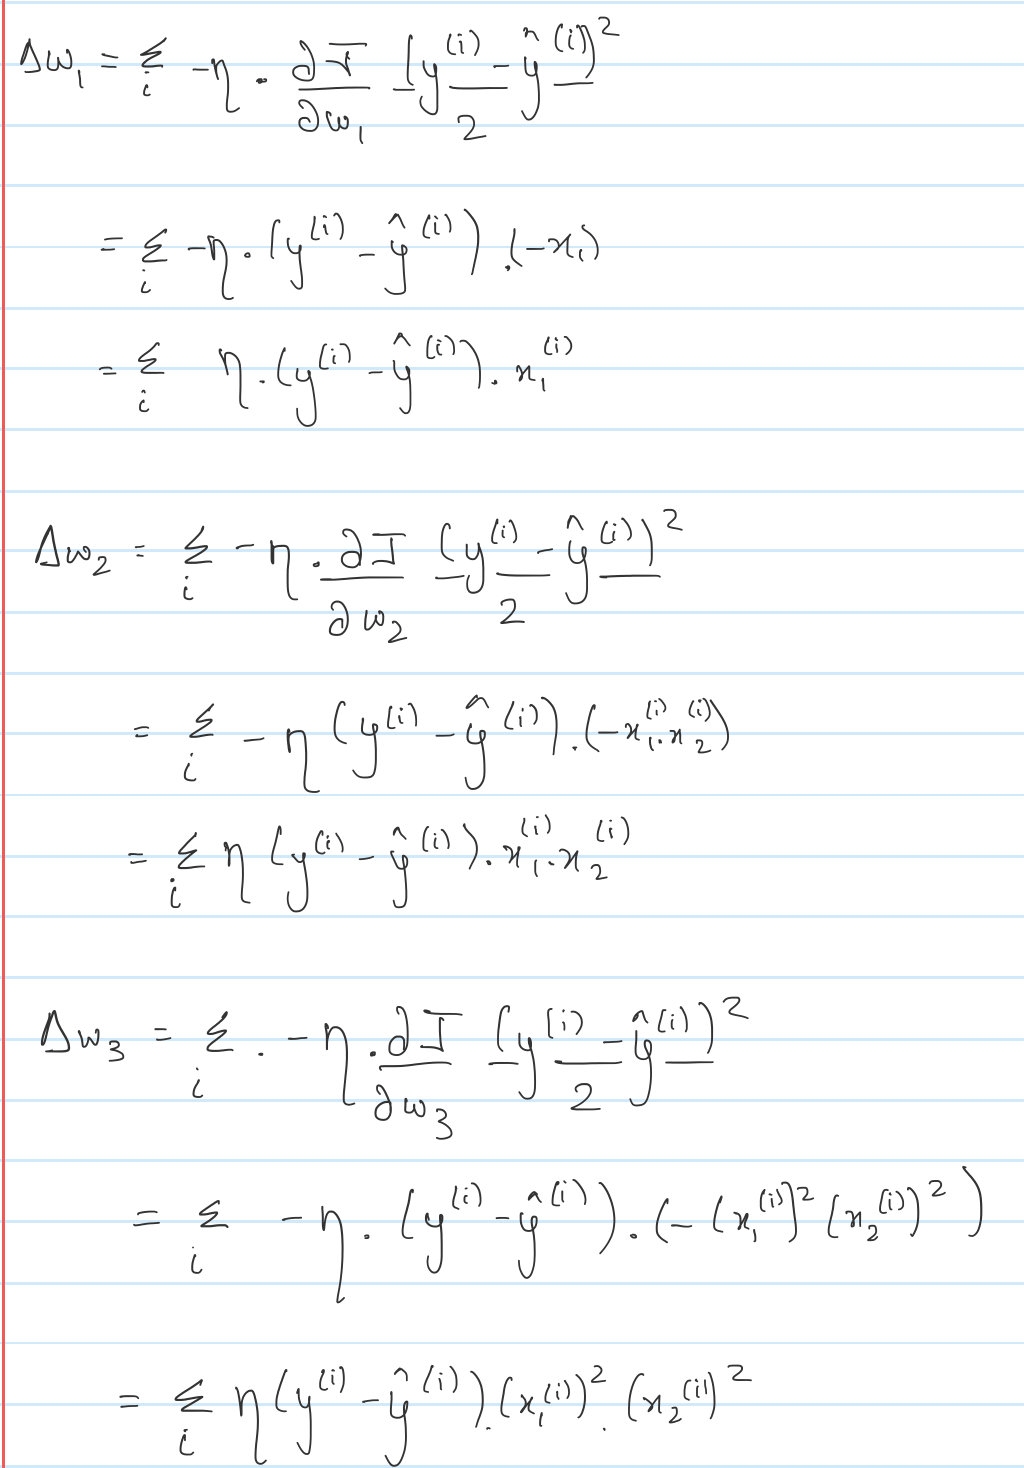
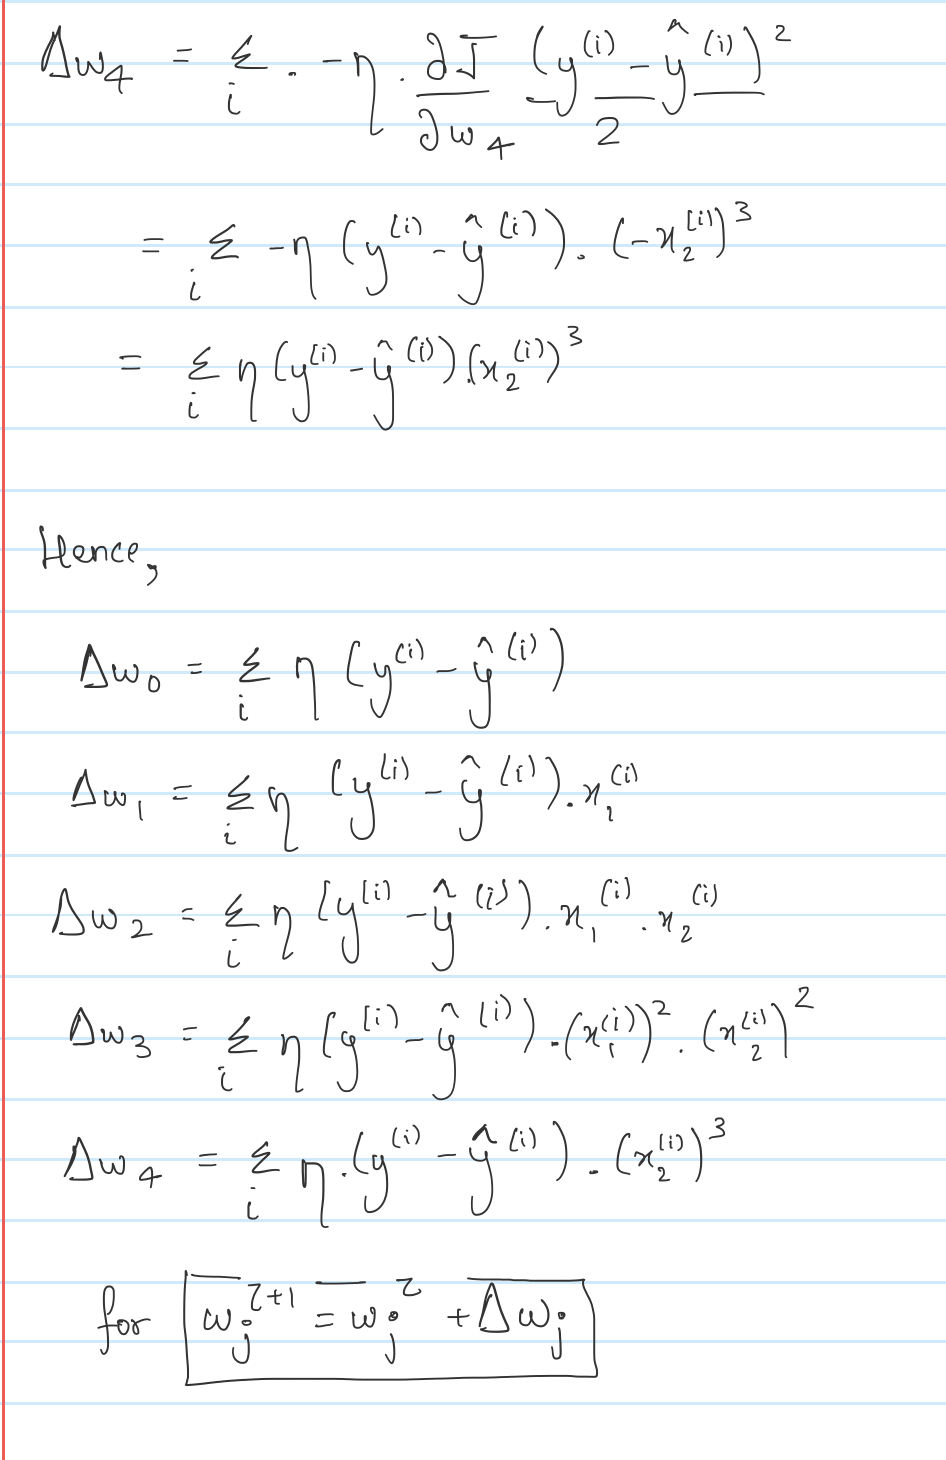

### 2. Code for SGD, SGD-Momentum and Adagrad

In [168]:
class LinearRegression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        self.coef = np.zeros(5) #one coef for each of the terms
        self.eps = 10**-6 #used only for adagrad
        self.cache = np.zeros(self.coef.shape) #used only for adagrad
        self.mu = 0.9 #used in momentum
        self.output = pd.DataFrame()
        self.velocity = np.zeros(self.coef.shape)


        
    def sgd(self, alpha, gradient):
        '''
        updates self.coef based on gradient using SGD
        '''
        self.coef = self.coef-alpha*gradient
        return self.coef
    
    def adagrad(self, alpha, gradient):
        '''
        updates self.coef based on gradient using Adagrad
        '''
        self.cache+=gradient**2
        adjusted_grad = gradient/np.sqrt(self.cache + self.eps)
        self.coef = self.coef - alpha*adjusted_grad
        return self.coef
    
    def sgd_momentum(self, alpha, gradient):
        '''
        updates self.coef based on gradient using Sgd_momentum
        '''
        self.velocity = self.mu*self.velocity + (1-self.mu)*gradient
        self.coef = self.coef - alpha*self.velocity
        return self.coef
    
        
    def fit(self, X, y, update_rule='sgd', plot=False):
        
        '''
        Fits the model for the given X, y. It uses the update rule mentioned by the parameter update_rule
        and displays a plot of the coefficients vs epochs and mse vs epochs if plot is True. 
        
        -> use get_features to get the features from X
        -> for epoch in epochs:
            iterate through all x, y.
                compute prediction using linearPredict.
                compute gradient.
                pass this gradient to the respective update rule and update the coefficients
                keep track of mse and coefficients
        -> plot if required
        
        '''
        ## Creating feature matrix
        
        X_features = self.get_features(X)
        
        for alpha in self.learning_rate:
            for reg in regularization:
                for epoch in range(self.n_epoch):
                    for i in range(len(X_features)):
                        
                        ## Predicting outcome with current weights and particular data point
                        y_hat = self.linearPredict(X_features[i])
                        
                        ##Defining gradient value
                        
                        gradient = 2*np.dot(X_features[i],(y_hat - y[i])) + 2*reg*self.coef
                        
                        ##Updating weights for SGD
                        if(update_rule=='sgd'):
                            self.coef = self.sgd(alpha, gradient)
                            
                        ##Updating weights for SGD-Momentum    
                        elif(update_rule=='sgd_momentum'):
                            self.coef = self.sgd_momentum(alpha, gradient)
                            
                        ##Updating weights for Adagrad
                        elif(update_rule=='adagrad'):
                            self.coef = self.adagrad(alpha, gradient)
                            
                    ##Updating MSE value after epoch run complete
                    mse = np.mean(np.power((self.linearPredict(X_features)-y),2))
                    
                    ##Recording values of epoch, learning rate, regularisation constant, weights and MSE at the end of the epoch
                    self.output = self.output.append([[epoch]+[alpha]+[reg]+[self.coef[0]]+[self.coef[1]]+[self.coef[2]]+[self.coef[3]]+[self.coef[4]]+[mse]])

        ##Renaming MSE recording DF columns
        self.output.columns = ['epoch','learning_rate','regularization','w0','w1','w2','w3','w4','mse']
        
        ##Filtering for rows recording MSE after last Epoch of each model
        self.output_best_base = self.output[self.output['epoch']==14]
        
        ##Sorting rows based in MSE (min to max) and filtering the top two values
        self.output_best = self.output_best_base.sort_values('mse').head(2)
        self.output_best.reset_index(inplace=True)
        
        ##Storing values of learning_rate and regularisation constant for lowest MSE model and creating DF for plotting
        best_alpha_1 = self.output_best.iloc[0,2]
        best_reg_1 = self.output_best.iloc[0,3]
        best_1 = self.output[(self.output['learning_rate']==best_alpha_1)&
                             (self.output['regularization']==best_reg_1)]
        
        ##Storing values of learning_rate and regularisation constant for lowest MSE model and creating DF for plotting
        best_alpha_2 = self.output_best.iloc[1,2]
        best_reg_2 = self.output_best.iloc[1,3]
        best_2 = self.output[(self.output['learning_rate']==best_alpha_2)&
                             (self.output['regularization']==best_reg_2)]
        
        print("Learning rate for lowest MSEs: {} \n Regularisation for lowest MSE: {} \n ---------------------------------- \n Learning rate for 2nd lowest MSE: {} \n Regularisation for 2nd lowest MSE: {} \n".format(best_alpha_1, best_reg_1 ,best_alpha_2, best_reg_2))
        
        
        ##Plotting
        if(plot):
            plt.rcParams["figure.figsize"] = (15,10)
            plt.subplot(2,2,1)
            plt.plot('epoch','mse',data=best_1)
            plt.title('Epoch vs MSE for the best combination')
            plt.ylabel('MSE')
            plt.xlabel('Epoch')
            plt.legend(loc="upper right")
            plt.subplot(2,2,2)
            plt.plot('epoch','w0',data=best_1,label='w0')
            plt.plot('epoch','w1',data=best_1,label='w1')
            plt.plot('epoch','w2',data=best_1,label='w2')
            plt.plot('epoch','w3',data=best_1,label='w3')
            plt.plot('epoch','w4',data=best_1,label='w4')
            plt.title('Epoch vs Coefficients')
            plt.ylabel('Coefficients')
            plt.xlabel('Epoch')
            plt.legend(loc="upper right")
            plt.subplot(2,2,3)
            plt.plot('epoch','mse',data=best_2)
            plt.title('Epoch vs MSE for the second best combination')
            plt.ylabel('MSE')
            plt.xlabel('Epoch')
            plt.legend(loc="upper right")
            plt.subplot(2,2,4)
            plt.plot('epoch','w0',data=best_2,label='w0')
            plt.plot('epoch','w1',data=best_2,label='w1')
            plt.plot('epoch','w2',data=best_2,label='w2')
            plt.plot('epoch','w3',data=best_2,label='w3')
            plt.plot('epoch','w4',data=best_2,label='w4')
            plt.title('Epoch vs Coefficients')
            plt.ylabel('Coefficients')
            plt.xlabel('Epoch')
            plt.legend(loc="upper right")

    def get_features(self, X):
       '''
       X (input) is the nx2 dimensional array - n data points with X_1 and X_2.
       It returns a nX5 dimensional array - n data points with 1, X_1, X_1X_2, X_1^2X_2^2, X_2^3.
       '''
       X_features = np.empty([500,5])
       for i in range(len(X)):
                X_features[i,0]=1
                X_features[i,1]=X[i,0]
                X_features[i,2]=X[i,0]*X[i,1]
                X_features[i,3]=X[i,0]*X[i,0]*X[i,1]*X[i,1]
                X_features[i,4]=X[i,1]*X[i,1]*X[i,1]
        
       return X_features
            
        
    def linearPredict(self, X_features):
       '''
       returns the dot product of X and self.coef
       '''
       return X_features.dot(self.coef)

In [147]:
data = pd.read_csv('q1_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

### Using SGD


Learning rate for lowest MSEs: 0.001 
 Regularisation for lowest MSE: 0 
 ---------------------------------- 
 Learning rate for 2nd lowest MSE: 0.0001 
 Regularisation for 2nd lowest MSE: 0 



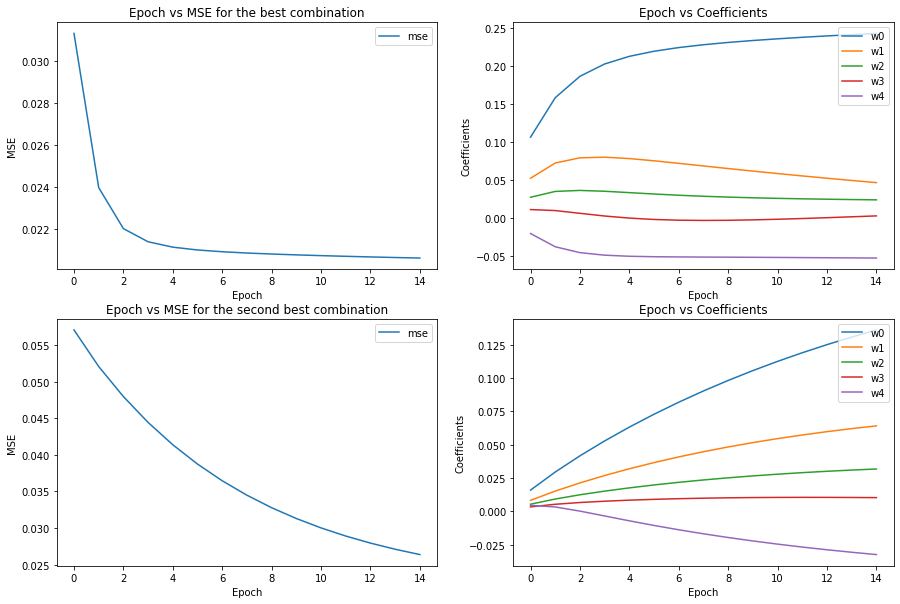

In [169]:
import warnings
warnings.filterwarnings("ignore")

model = LinearRegression(learning_rate,regularization,n_epochs)
model.fit(X,y,update_rule = 'sgd', plot=True)

### Using SGD-Momentum

Learning rate for lowest MSEs: 0.01 
 Regularisation for lowest MSE: 0 
 ---------------------------------- 
 Learning rate for 2nd lowest MSE: 0.001 
 Regularisation for 2nd lowest MSE: 0 



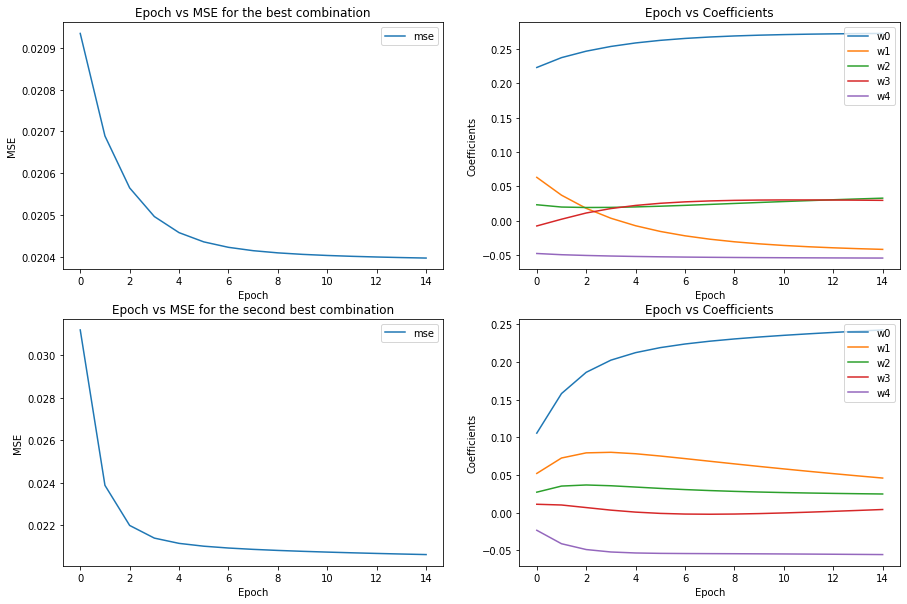

In [170]:
import warnings
warnings.filterwarnings("ignore")

model = LinearRegression(learning_rate,regularization,n_epochs)
model.fit(X,y,update_rule = 'sgd_momentum', plot=True)

### Using Adagrad

Learning rate for lowest MSEs: 1.0 
 Regularisation for lowest MSE: 0 
 ---------------------------------- 
 Learning rate for 2nd lowest MSE: 0.1 
 Regularisation for 2nd lowest MSE: 0 



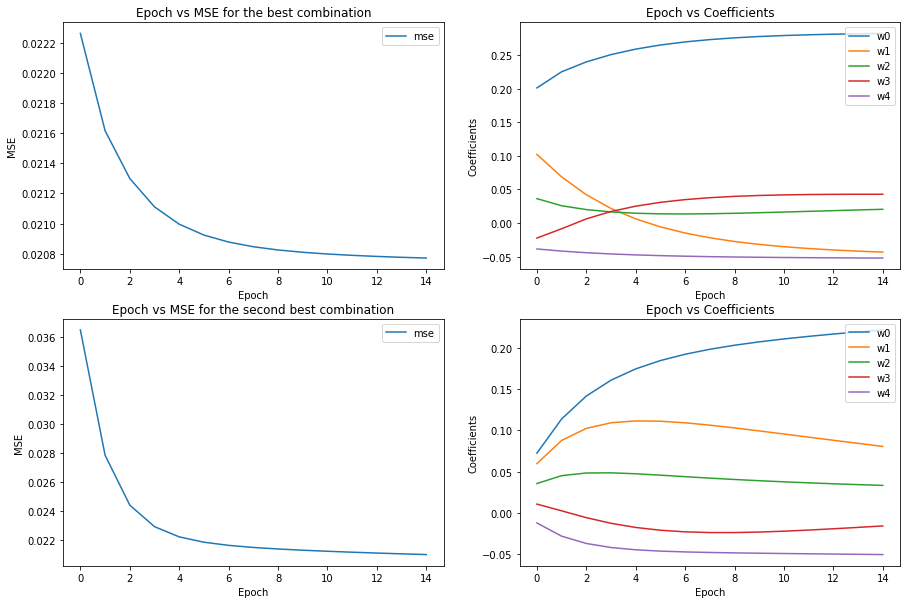

In [171]:
import warnings
warnings.filterwarnings("ignore")

model = LinearRegression(learning_rate,regularization,n_epochs)
model.fit(X,y,update_rule = 'adagrad', plot=True)

### 3. Observations

Ans. 

Minimum MSE is acheived in Adagrad for the maximum initial setting of the learning rate @ 1.0. 

The reason for the Adagrad to work with higher learning rate is due to the fact that AdaGrad adaptively scaled the learning rate with respect to the accumulated squared gradient at each iteration in each dimension.

Neither of SGD or SGD momentum are able to achieve any closer MSE value with the learning rate of 0.001. They require smaller learning rate values for the solution to converge.

# 2.  Tensor Playground (25pts)
Visit http://playground.tensorflow.org for this problem

From the far right, select "Classification" as the problem type, and select the 4th of the four data sets (the spiral data which is bottom right).  

1) Use the following default settings - test/training ratio 50%, Noise 0, Batch Size 10, learning rate 0.03, one hidden layer with 4 neurons, input as X_1, X_2 and no Regularization. Run two experiments - one using Tanh as the activation function and one using the linear activation function. Report the train, test losses for both these experiments at the end of 1000 epochs(4 values). What difference do you observe in the decision boundary? Why? (4 pts)

2) Use the above setting, set the activation to be Tanh and learning rate to be 0.03. Report the train, test losses at the end of 1000 epochs for 2, 4, and 8 neurons in the hidden layer (6 values). What do you observe in the decision boundary as the number of neurons increases? Why? (4 pts)

3) Use the above setting, set the activation to be Tanh and have four neurons in the hidden layer. Report the train, test losses at the end of 100 epochs and 1000 epochs for learning rates of 3, 0.3, 0.03 and 0.003 (8 values). What do you observe in the loss curves? Explain. (4 pts)

4) Use the above setting, set the activation to be Tanh and learning rate to be 0.03. Use two hidden layers - first hidden layer with 6 neurons and second hidden layer with 4 neurons. Report the train, test values at the end of 2000 epochs (2 values) and attach the screenshot from Tensor playground. Explain the changes you see with this additional hidden layer. (5 pts).

5) Fix the test/training ratio 50% and Noise to 0 (same as before). Play around with any of the other hyperparameters, network architectures and input features (such as $sin(X_1), X_1^2$ etc.) and report the best train/test loss you could get (test loss should be atmost 0.06). Attach the screenshot from  Tensor playground for the same (show your full network, output and parameters). Briefly justify your decisions, and comment on difficulties/tradeoffs, what helps/what doesn't,etc.  (8 pts)
 

### ANSWER

### 1. Activation function tweaking

**Activation function: Linear**

Test loss 0.471

Training loss 0.475

Decision boundary: Linear - horizontal line across the data space.

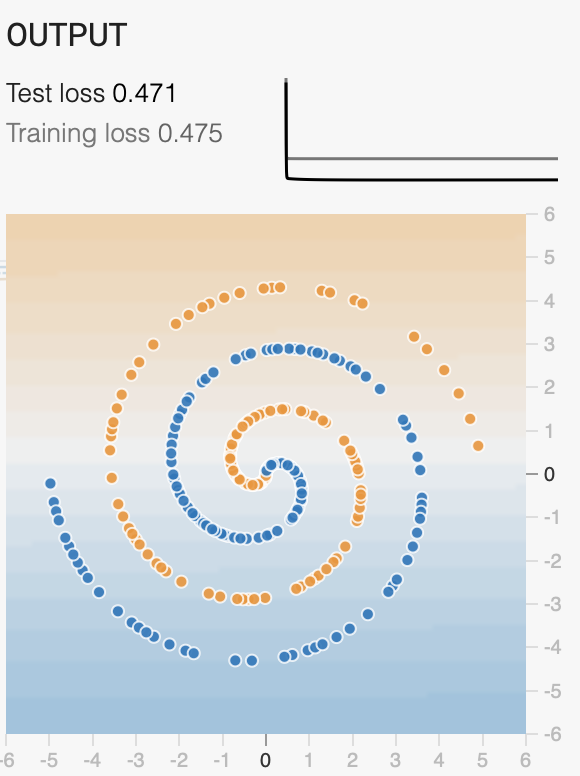

**Activation function: Tanh**

Test loss 0.423

Training loss 0.359

Decision boundary: Non-Linear

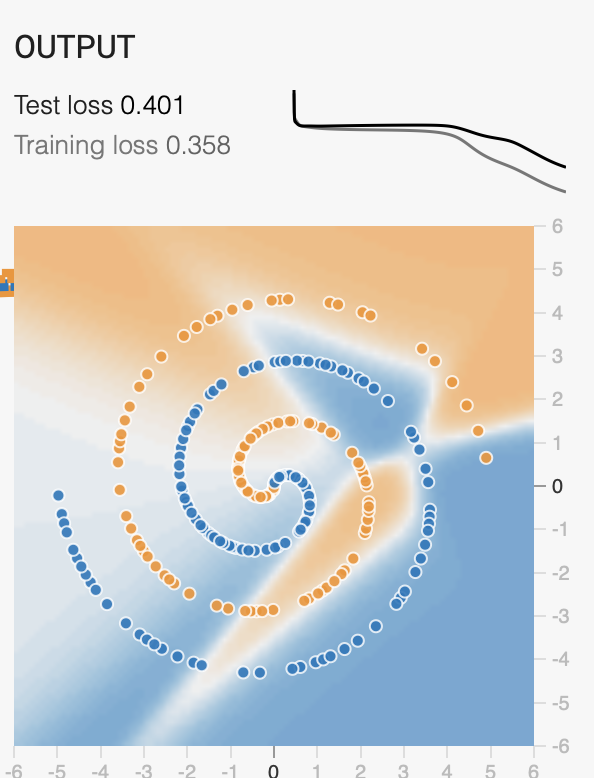

**Reason for difference in boundaries:**

Inherently, the neural net is an additive (linear) model. To introduce non-linearity, we introduce 'activation functions' that squish the value at each neuron between 0 and 1 using non-linear, continuous functions like Tanh, Sigmoid, ReLu to help the model learn non-linear decision boundaries like in this case.

We can see that for the model with the lienar activation function, the losses remain the same throughout the training period as the linear decision boundary fails to fit to the non-linear data, while the losses for the model with Tanh activation and hence non-linear decision boundaries reduce as epochs pass, signalling that a non-linearity introduced into the model helps it fit the data better.

This makes sense, since we know that the data provided are in a spiral (non-linear)

### 2. Hidden Layer Tweaking

**Number of neurons= 2**

Test loss 0.476

Training loss 0.473

**Number of neurons= 4**

Test loss 0.451

Training loss 0.396

**Number of neurons= 8**

Test loss 0.319

Training loss 0.245

**Reason for change in losses:**

Adding more neurons in the hidden layer allows the model to become more flexible and hence to better fit the data (better predict the complex function that generates the data) as it has more tunable parameters that can capture the variation in the data.

### 3. Learning Rate Tweaking

**Learning Rate: 0.003**

**Number of Epochs: 100**

Test loss 0.476

Training loss 0.478

**Number of Epochs: 1000**

Test loss 0.477

Training loss 0.473

**Observation:** Both Test and Training losses curves change very less with passing epochs, since learning rate is very small.

_____________

**Learning Rate: 0.03**

**Number of Epochs: 100**

Test loss 0.477

Training loss 0.476

**Number of Epochs: 1000**

Test loss 0.464

Training loss 0.443

**Observation:** Both Test and Training loss curves dip (better fit) a little more than before with passing epochs, since learning rate is 10x that of the previous run.

_____________

**Learning Rate: 0.3**

**Number of Epochs: 100**

Test loss 0.475

Training loss 0.444

**Number of Epochs: 1000**

Test loss 0.494

Training loss 0.433

**Observation:** After about a 100 epochs, the loss curves start exhibiting rapid oscillations due to the higher learning rate.

_____________

**Learning Rate: 3**

**Number of Epochs: 100**

Test loss 0.593

Training loss 0.560

**Number of Epochs: 1000**

Test loss 0.624

Training loss 0.575

**Observation:** The loss curves exhibit large oscillations since the beginning due to the extremely high learning rate, eventually causing divergence of solution with higher losses after more epochs.


### 4. Adding a hidden layer

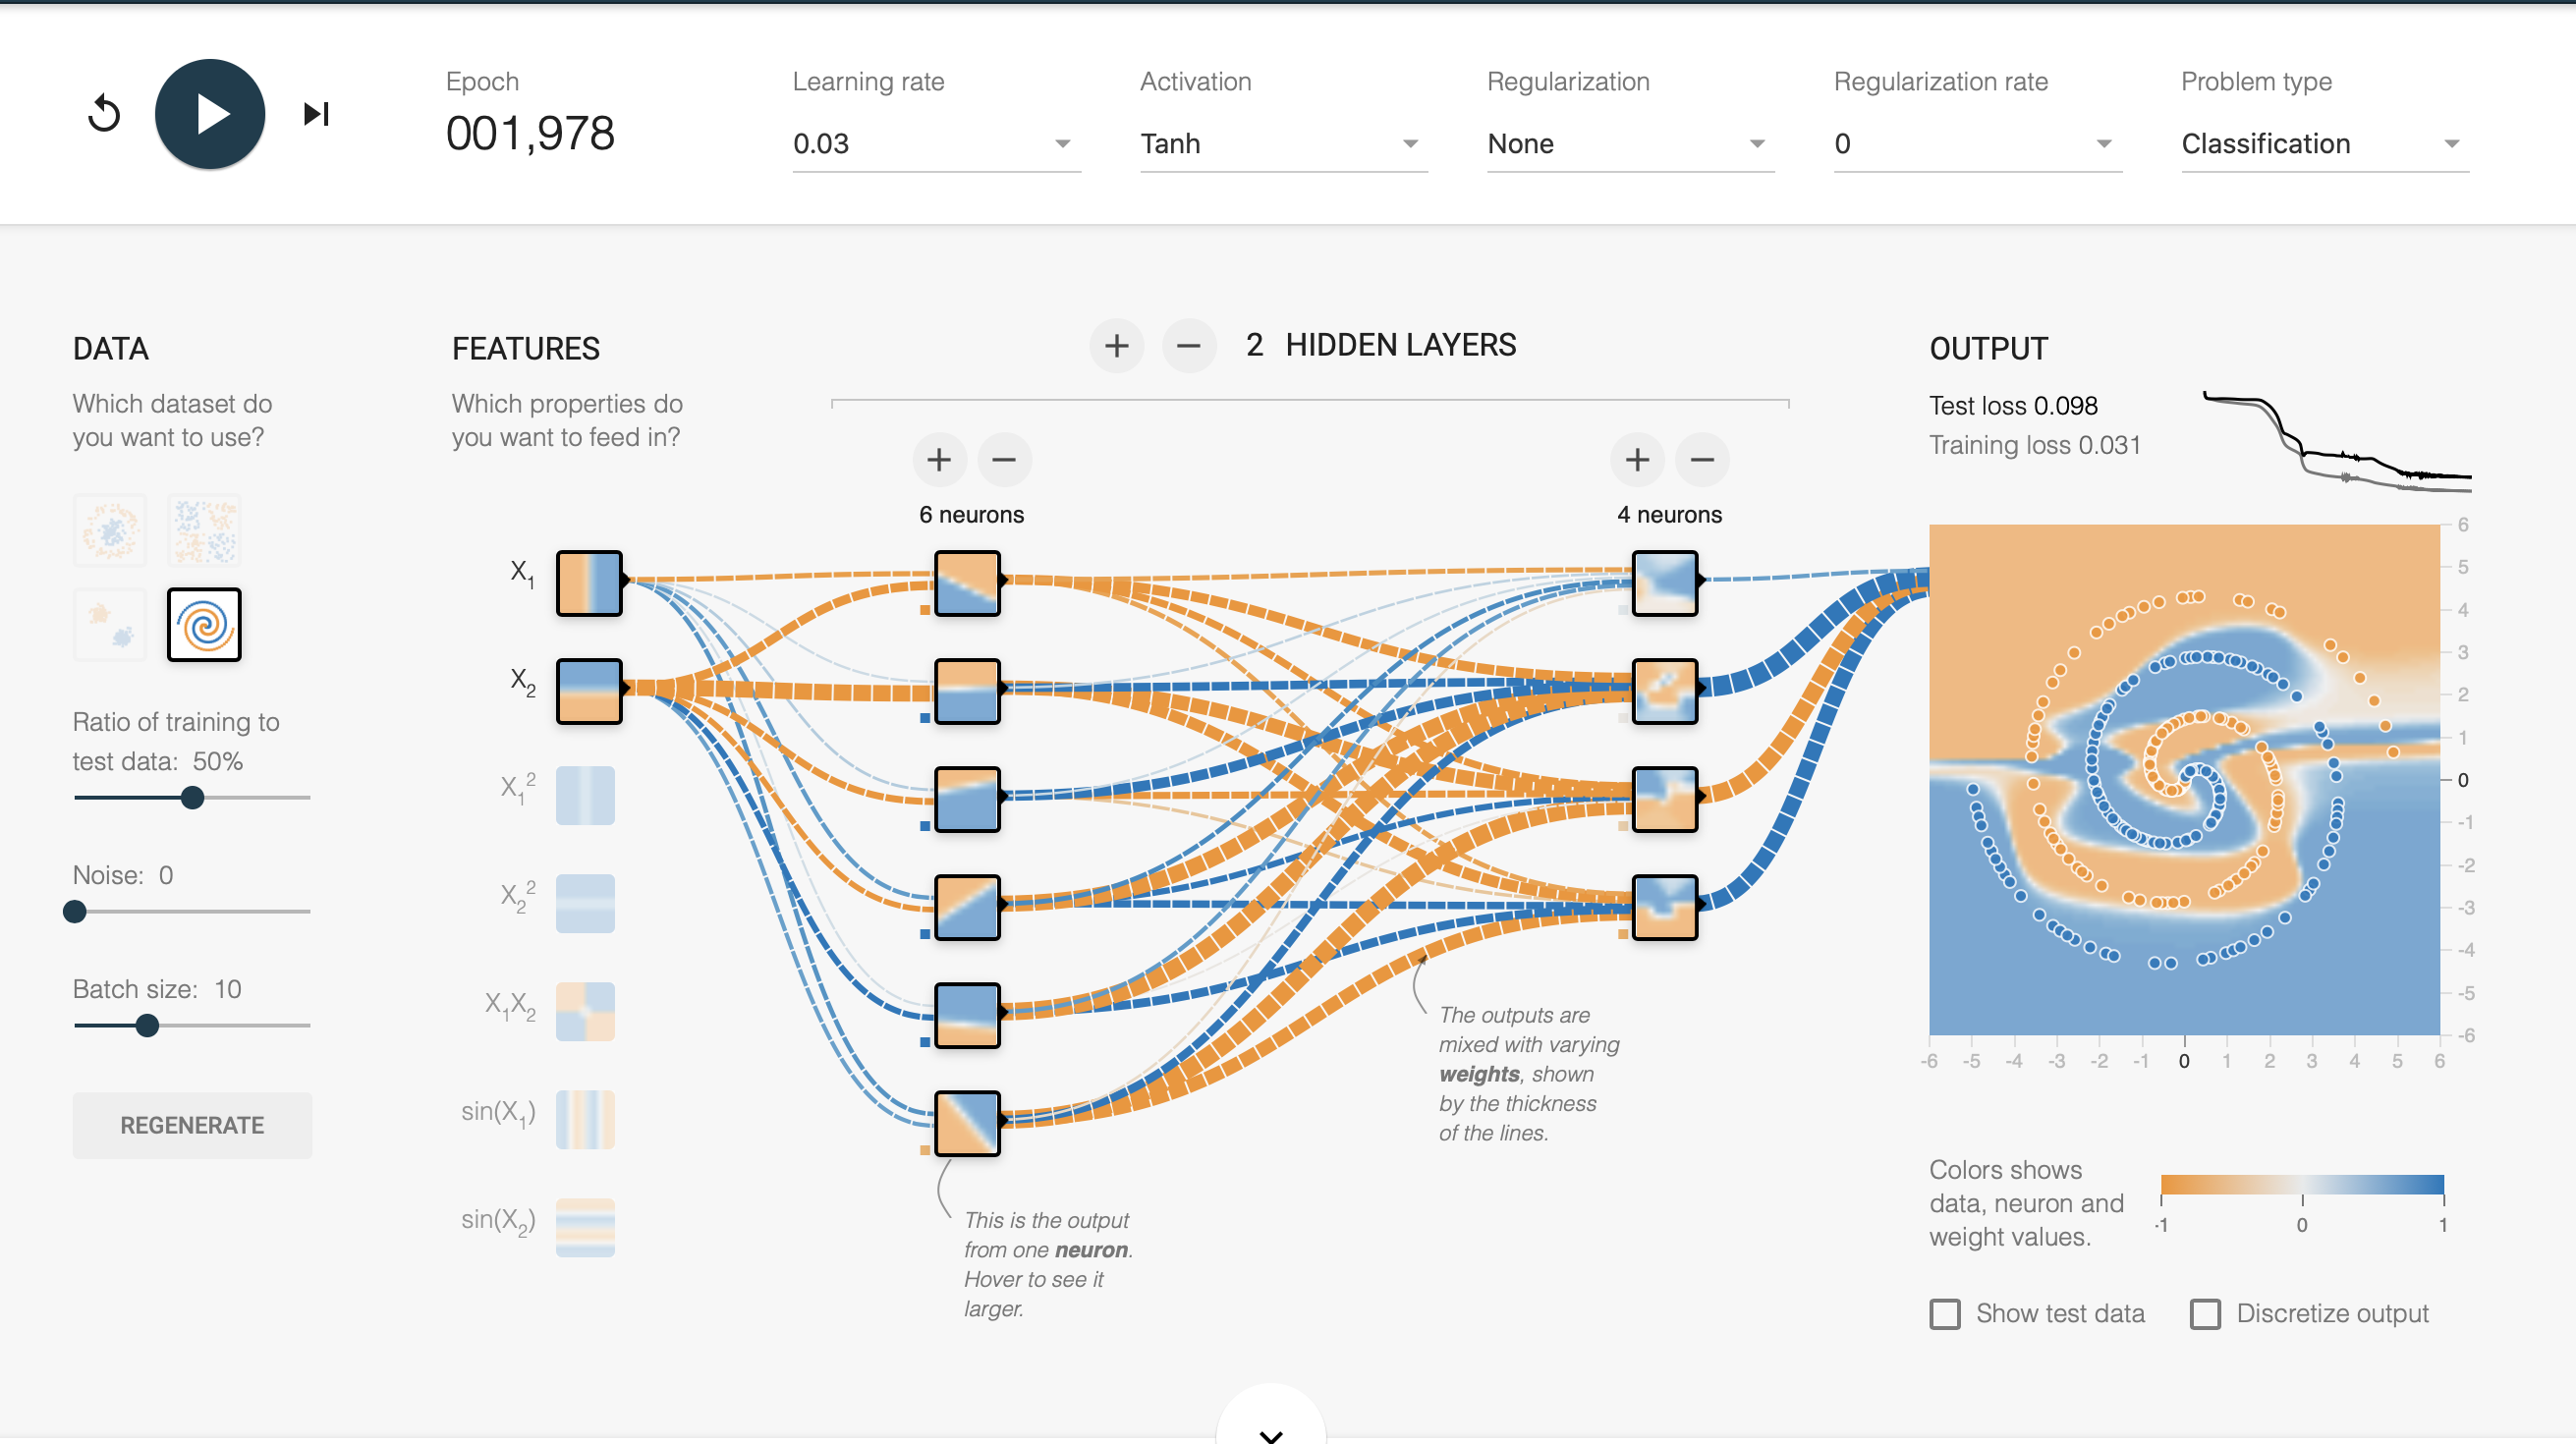

With the addition of another hidden layer, we observe a major drop in the test and training losses. This can be attributed to the increase in flexibility of the model to capture a more complex function.

We also understand that while adding additional hidden layers can help in capturing complexity, it can also go beyond a point of generalisability to overfit the training data and give higher test losses in cases where the model is more complex than the complexity requirement of the problem at hand.

Since the underlying function that generates the spiral data is fairly complex, the addition of a second hidden layer in this case help the model to fit the data bettter.

### 5. Changing inputs

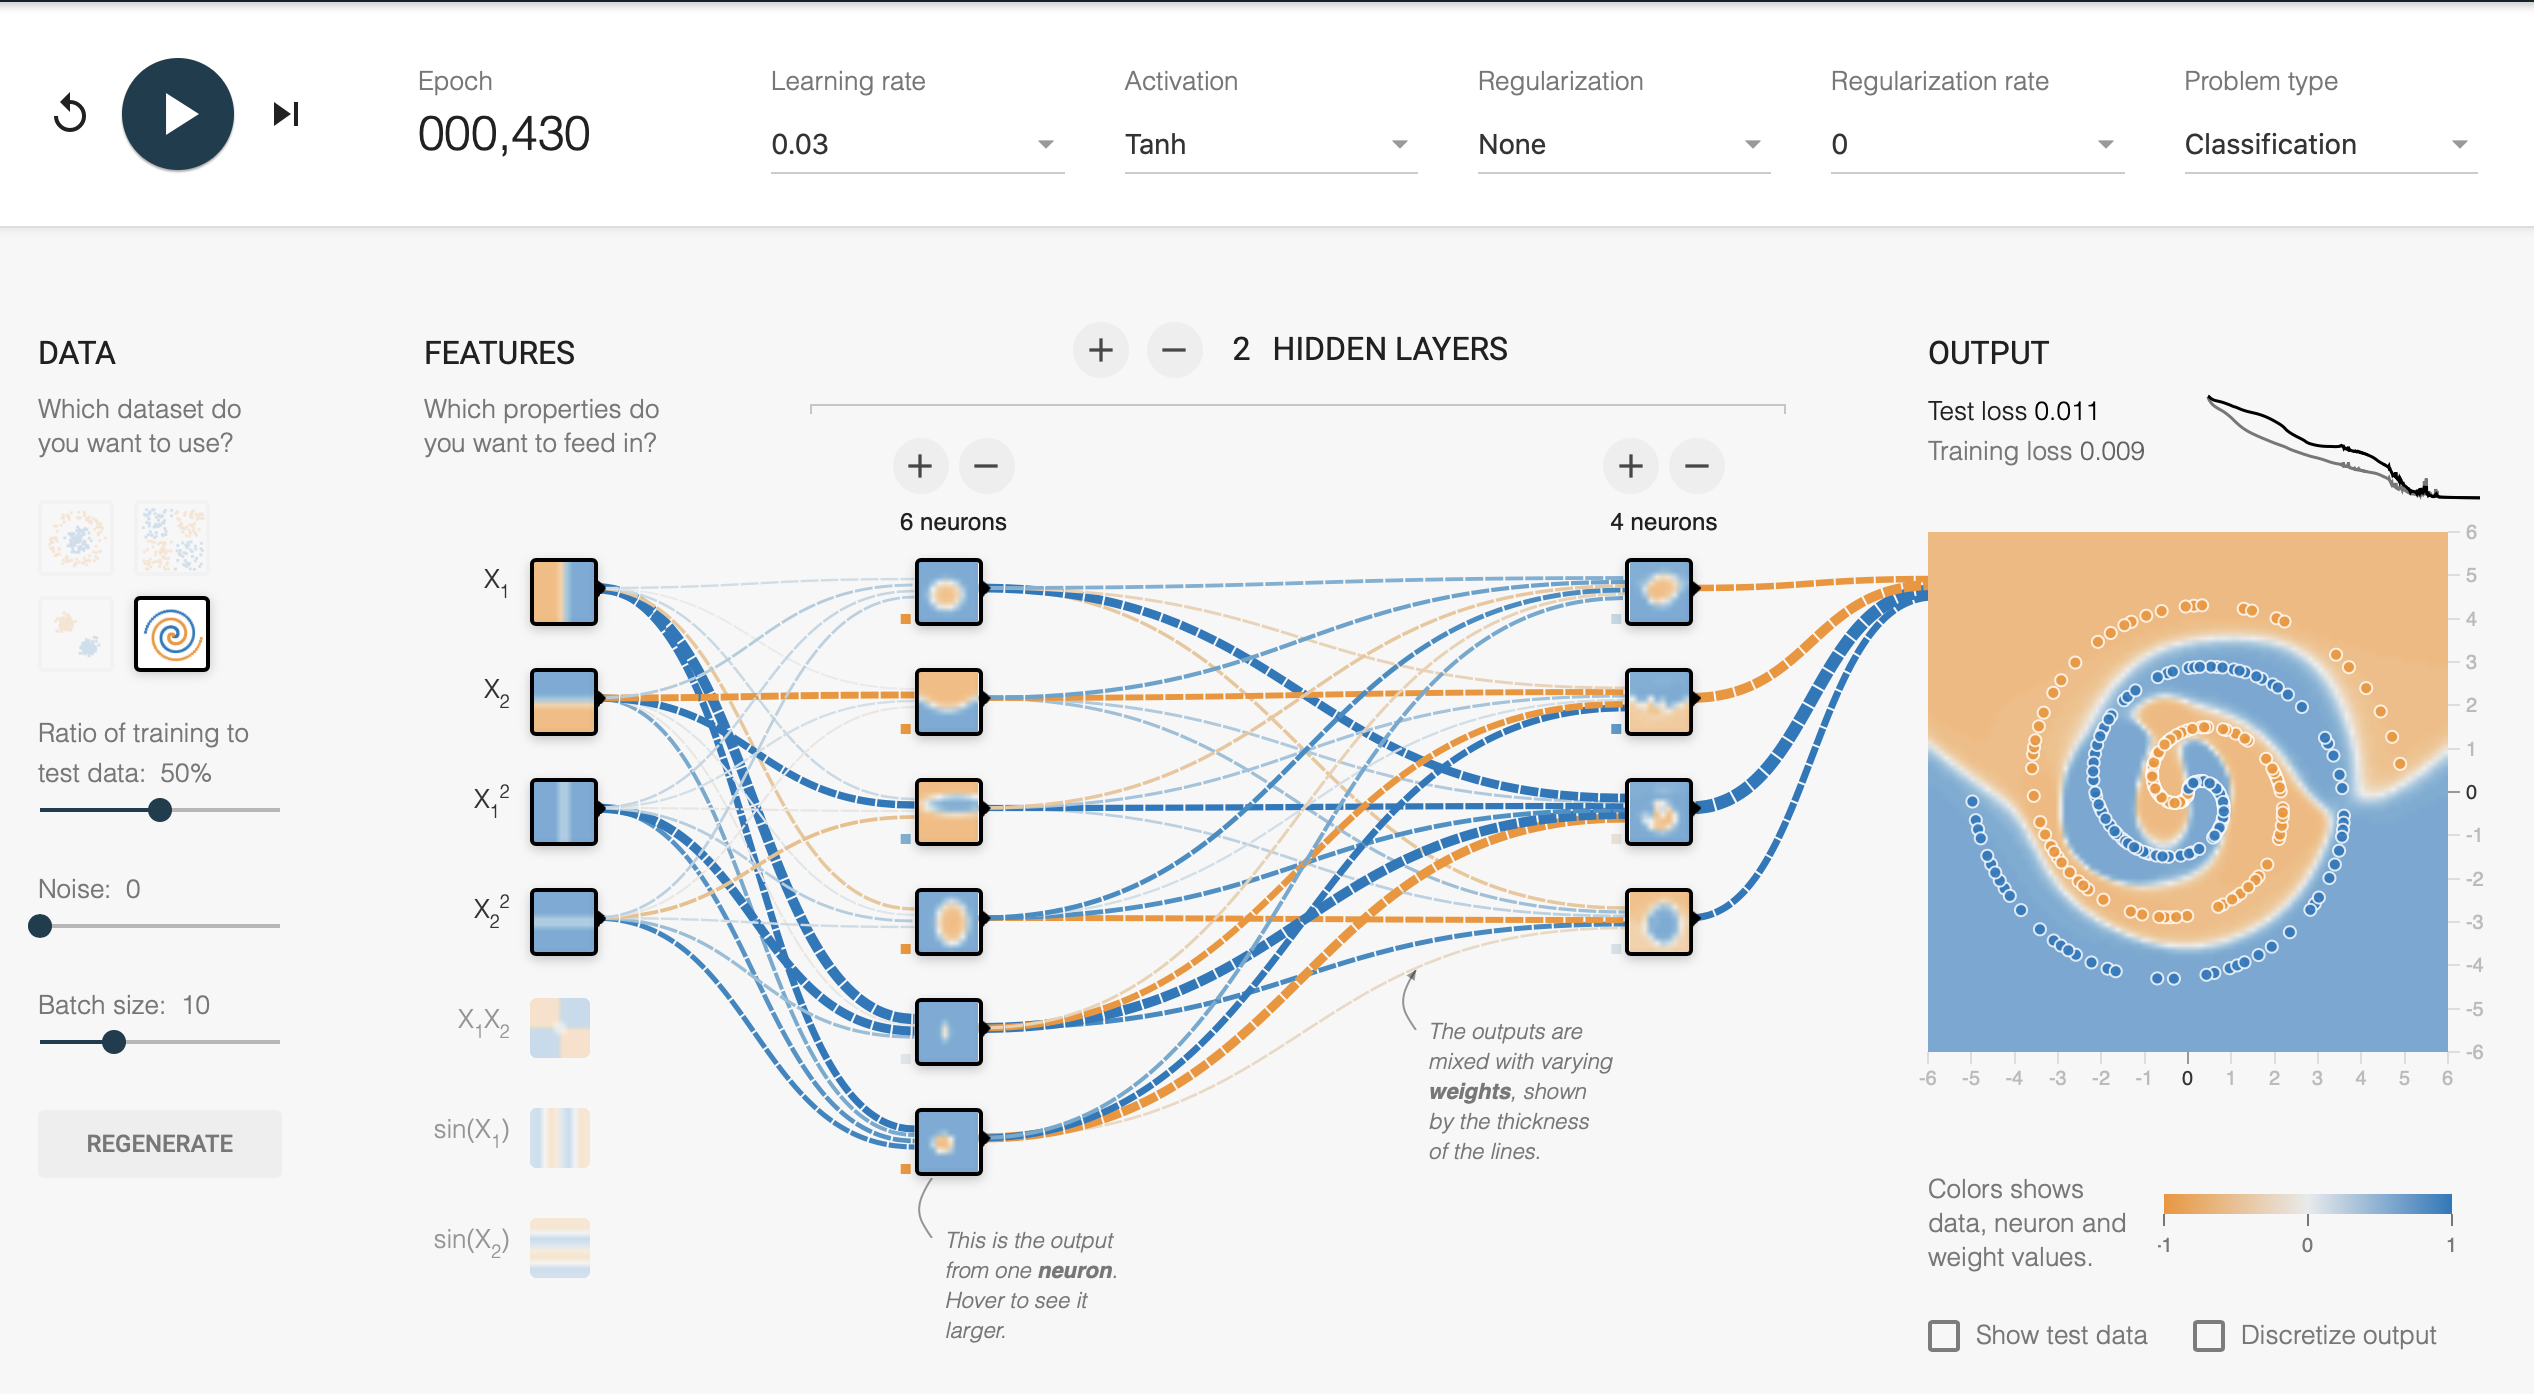

Since the data is in a spiral form, we related that to a decaying circle/ellipse (roughly) to get an idea of what the generator function for this pattern could look like.

Since ellipse has quadratic and linear terms for both the variables, we included both of those terms for both the variables and in the very first iteration of possible combinations acheived a Test Loss of 0.011, which is less than 0.06 *within 430 epochs*.

# Question 3: Decision Trees

1. (5pts) In this question, we will learn to build a Decision Tree classifier. Load the q3_dataset.csv from the files. The column named 'label' is the $Y$ we are trying to predict using the features given in all other columns. As usual, we first split the data in a train and test set and build our model on train set and test the performance on the test set. Use the class tree.DecisionTreeClassifier (http://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree) to fit a model with default parameters and report its performance on the test data. Now, visualize the tree, for visualisation, if your classifier object is called clf, use the given commands to save the generated tree as a '.dot' file using export_graphviz(https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html) and paste the contents of the file in Webgraphviz (http://www.webgraphviz.com/) to generate the tree.


In [3]:
from sklearn.model_selection import *
from sklearn.tree import *
from sklearn.metrics import confusion_matrix, precision_score, recall_score, average_precision_score, precision_recall_curve, roc_curve,roc_auc_score,classification_report
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/apoorvmehrotra/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [4]:
## read data
data= pd.read_csv('q3_dataset.csv')
x = data.drop(['label'],axis=1)
y = data.label.values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=20)

## creating binary response variable
y_train = np.where(y_train=='B',0,1).reshape(y_train.shape[0],1)
y_test = np.where(y_test=='B',0,1).reshape(y_test.shape[0],1)

In [5]:
## Model training

clf = DecisionTreeClassifier(random_state=32)
clf.fit(x_train,y_train)

## Model summary

pred = clf.predict(x_test)
accuracy = clf.score(x_test,y_test)
cm = confusion_matrix(y_test,pred)
fpr, tpr, th = roc_curve(y_test,pred)
sgd_auc = roc_auc_score(y_test,pred)
auc = roc_auc_score(y_test,pred)

Accuracy of classifier: 0.9474
Tree classifier confusion matrix


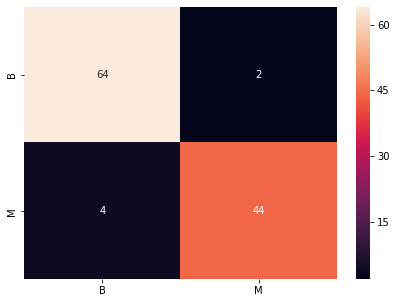

In [6]:
## Printing the results

print ('Accuracy of classifier:',round(accuracy,4))
print ('Tree classifier confusion matrix')
index = ['B','M']  
columns = ['B','M']    
cm_df = pd.DataFrame(cm,columns,index) #,columns,index
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))
sns.heatmap(cm_df,annot=True,fmt='g')
show()

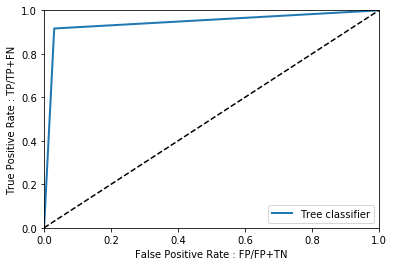

AUC: 0.9432


In [7]:
## ROC curve
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate : FP/FP+TN')
    plt.ylabel('True Positive Rate : TP/TP+FN')
    
plot_roc_curve(fpr,tpr,label="Tree classifier")
legend(loc="lower right")
show()

print ('AUC:',round(auc,4))

In [8]:
## save tree as .dot
with open("am93269_tree.dot", 'w') as f:
    f = export_graphviz(clf, out_file=f)

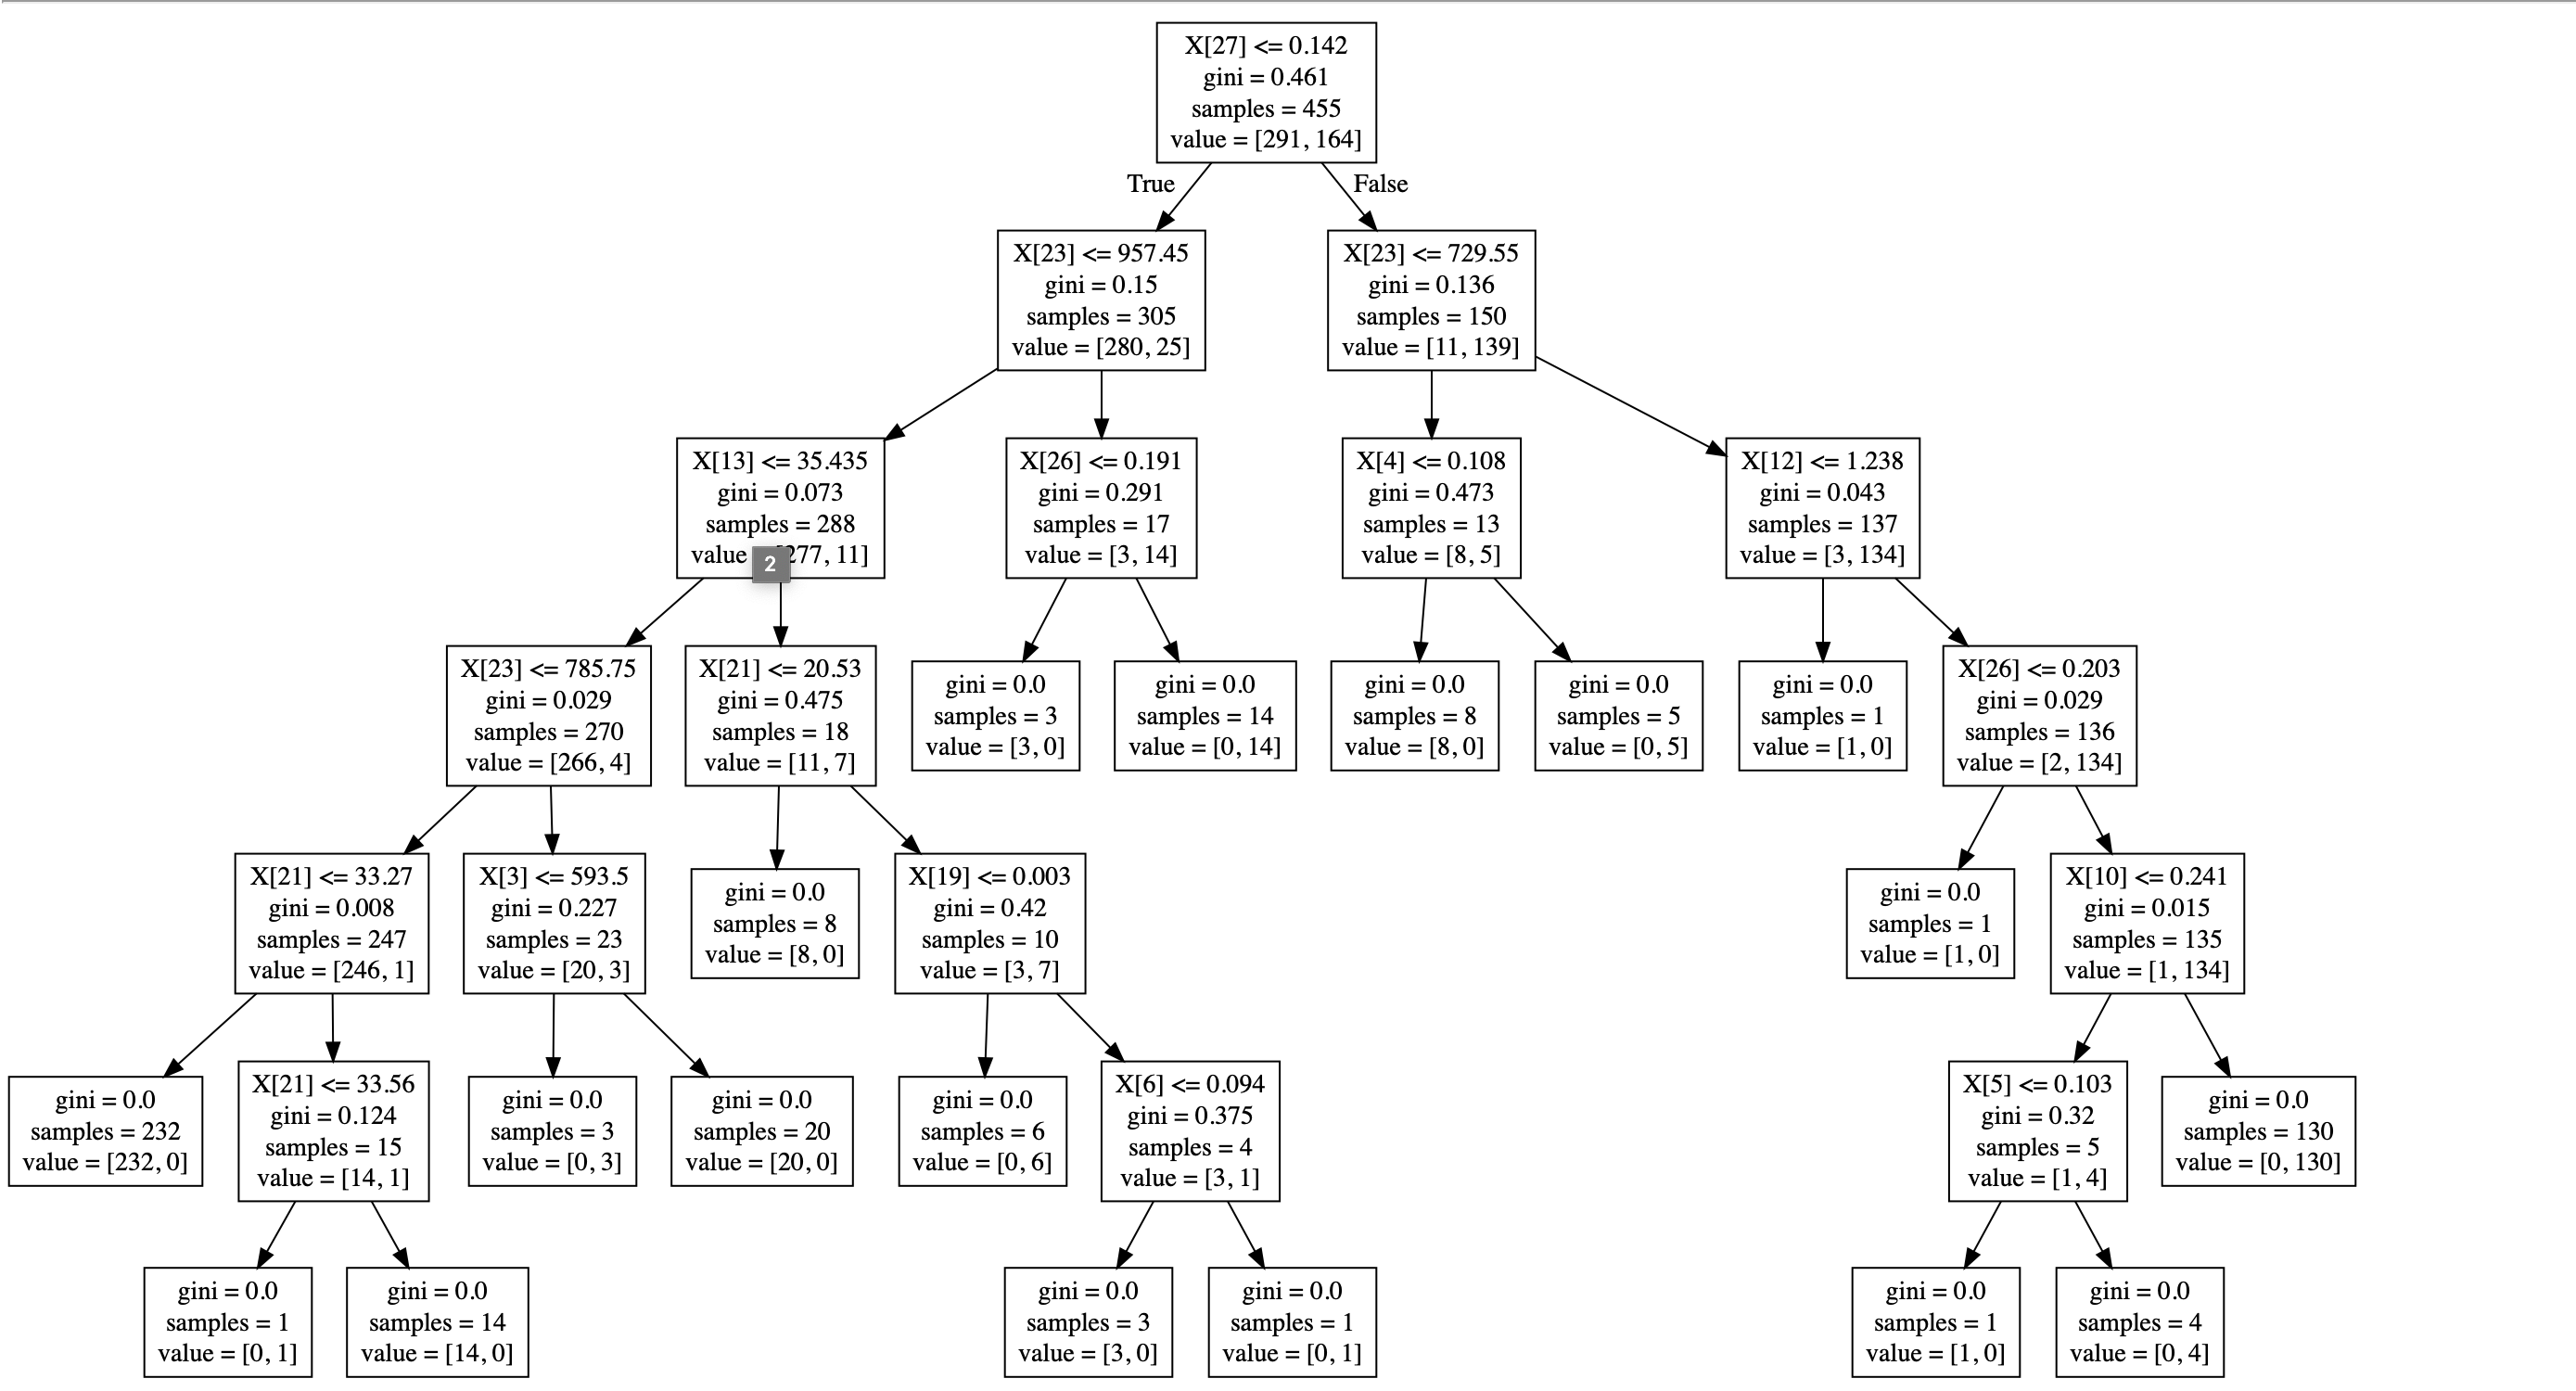

2. (10pts) We can guide the learning of a Decision Tree classifier by specifying various parameters governing its construction. For example, the max_depth parameter forces the algorithm to stop after at most that many levels, the min_samples_split parameter lower bounds the amount of data required to split nodes when learning and the parameter called criterion determines what function to use to create splits at each node. For both type of criteria, gini and entropy, test the max_depth values in the range 1, 2, ..., 20 , and min_samples_split in the range $2^{1}, 2^{2}, ..., 2^{15}$. Visualise the best classification trees that you get for different criterion parameter and observe how do they differ. 

## Gini and Entropy based classifiers

In [38]:
## Classification tree classifier

clf2_gini = DecisionTreeClassifier(splitter="best", max_depth=None,
                             min_samples_split=2, min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, max_features=None,
                             random_state=20, max_leaf_nodes=None, min_impurity_decrease=0.0,
                             min_impurity_split=None, class_weight=None, presort=False)

In [45]:
## Parameter grid and gridsearch for Gini

param_grid = {
    'criterion':['gini'],
    'max_depth': np.arange(1,21,1),
    'min_samples_split': np.power([2], np.arange(1,16,1)),
}
grid_search = GridSearchCV(estimator = clf2, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

clf2_gini = grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    1.2s finished


In [46]:
## Printing best parameters

print (clf2_gini.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 4}


In [51]:
## Visualising best tree for Gini

clf2_gini_best = DecisionTreeClassifier(splitter="best", criterion="gini", max_depth=5,
                             min_samples_split=4, min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, max_features=None,
                             random_state=20, max_leaf_nodes=None, min_impurity_decrease=0.0,
                             min_impurity_split=None, class_weight=None, presort=False)


clf2_gini_best.fit(x_train,y_train)

# with open("am93269_gini_tree.dot", 'w') as f:
#     f = export_graphviz(clf2_gini_best, out_file=f)

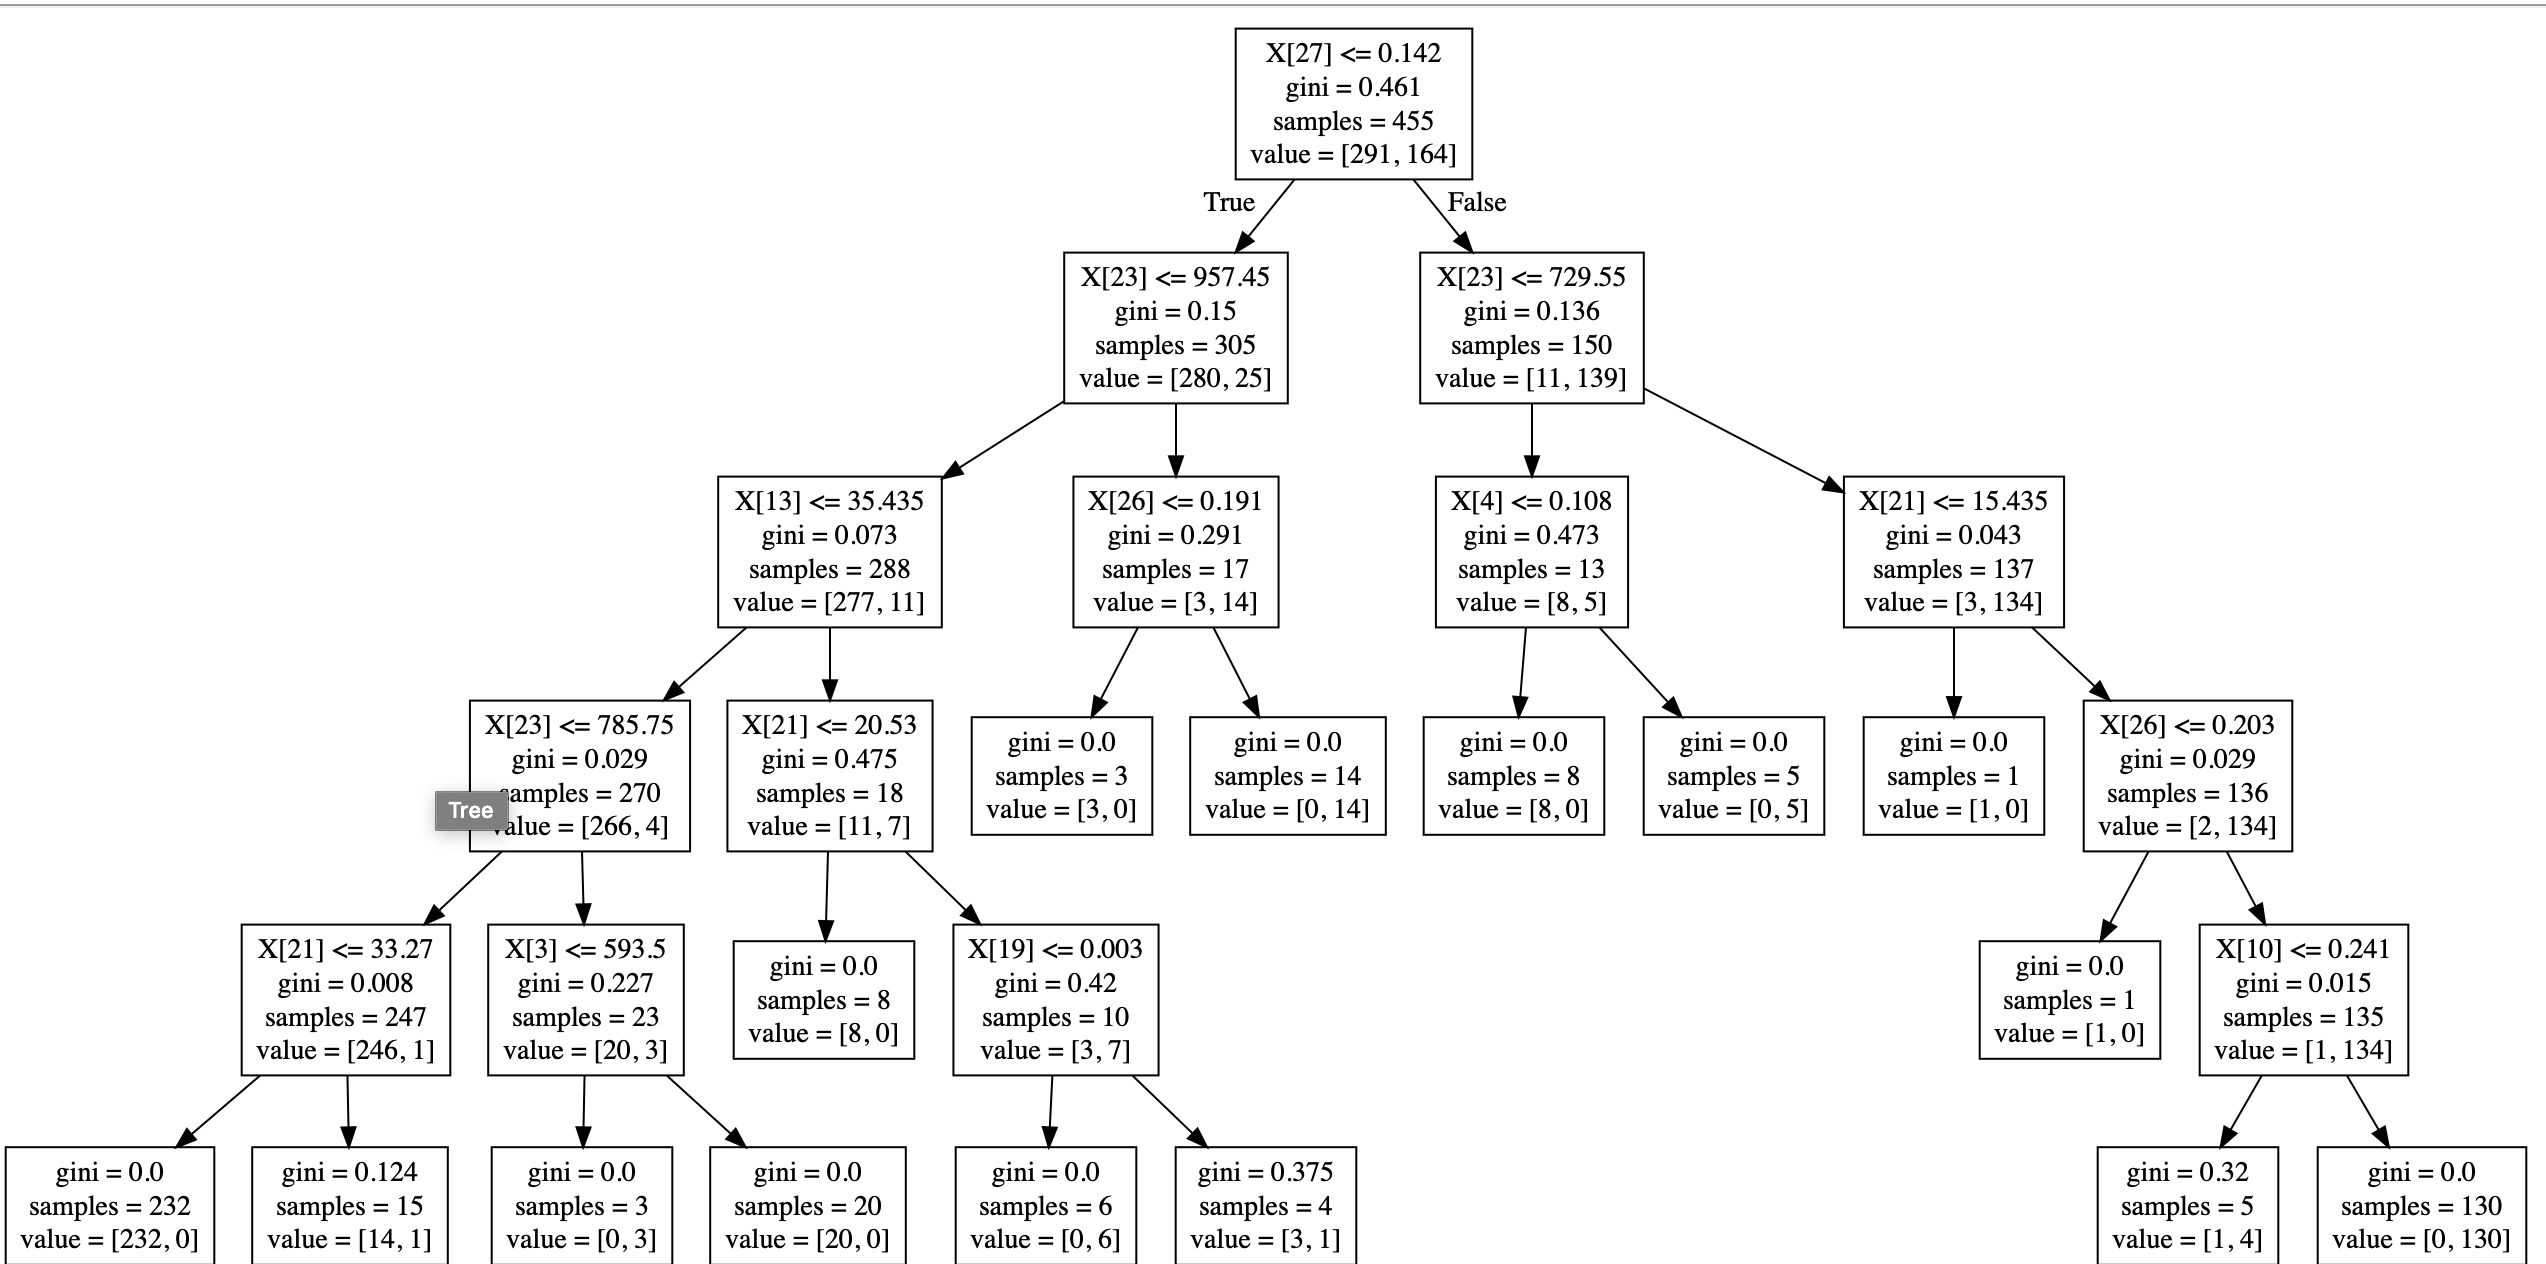

Criteria: Gini
Tree classifier confusion matrix


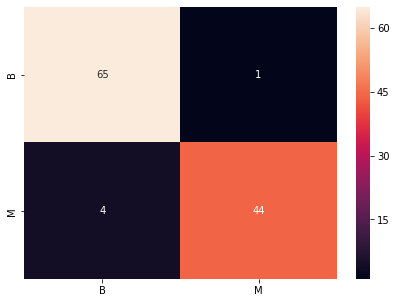

AUC: 0.9507575757575757
Accuracy: 0.956140350877193


In [59]:
## Model summary - Gini
best_gini_pred = clf2_gini_best.predict(x_test)
best_gini_accuracy = clf2_gini_best.score(x_test,y_test)
best_gini_cm = confusion_matrix(y_test,best_gini_pred)
fprg, tprg, thg = roc_curve(y_test,best_gini_pred)
best_gini_auc = roc_auc_score(y_test,best_gini_pred)

print('Criteria: Gini')
print ('Tree classifier confusion matrix')
index = ['B','M']  
columns = ['B','M']    
cm_gini = pd.DataFrame(best_gini_cm,columns,index)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))
sns.heatmap(cm_gini,annot=True,fmt='g')
show()    
print ('AUC:',best_gini_auc)
print ('Accuracy:',best_gini_accuracy)

In [47]:
## Defining tree for entropy fit 

clf2_ent = DecisionTreeClassifier(splitter="best", max_depth=None,
                             min_samples_split=2, min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, max_features=None,
                             random_state=20, max_leaf_nodes=None, min_impurity_decrease=0.0,
                             min_impurity_split=None, class_weight=None, presort=False)

In [48]:
## Parameter grid and gridsearch for Entropy

param_grid_entropy = {
    'criterion':['entropy'],
    'max_depth': np.arange(1,21,1),
    'min_samples_split': np.power([2], np.arange(1,16,1)),
}
grid_search_entropy = GridSearchCV(estimator = clf2, param_grid = param_grid_entropy, 
                          cv = 5, n_jobs = -1, verbose = 2)

clf2_ent = grid_search_entropy.fit(x_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    1.3s finished


In [49]:
## Printing best parameters

print (clf2_ent.best_params_)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 16}


In [52]:
## Visualising best tree for Entropy

clf2_ent_best = DecisionTreeClassifier(splitter="best", criterion="entropy", max_depth=5,
                             min_samples_split=16, min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, max_features=None,
                             random_state=20, max_leaf_nodes=None, min_impurity_decrease=0.0,
                             min_impurity_split=None, class_weight=None, presort=False)

clf2_ent_best.fit(x_train,y_train)

# with open("am93269_ent_tree.dot", 'w') as f:
#     f = export_graphviz(clf2_ent_best, out_file=f)

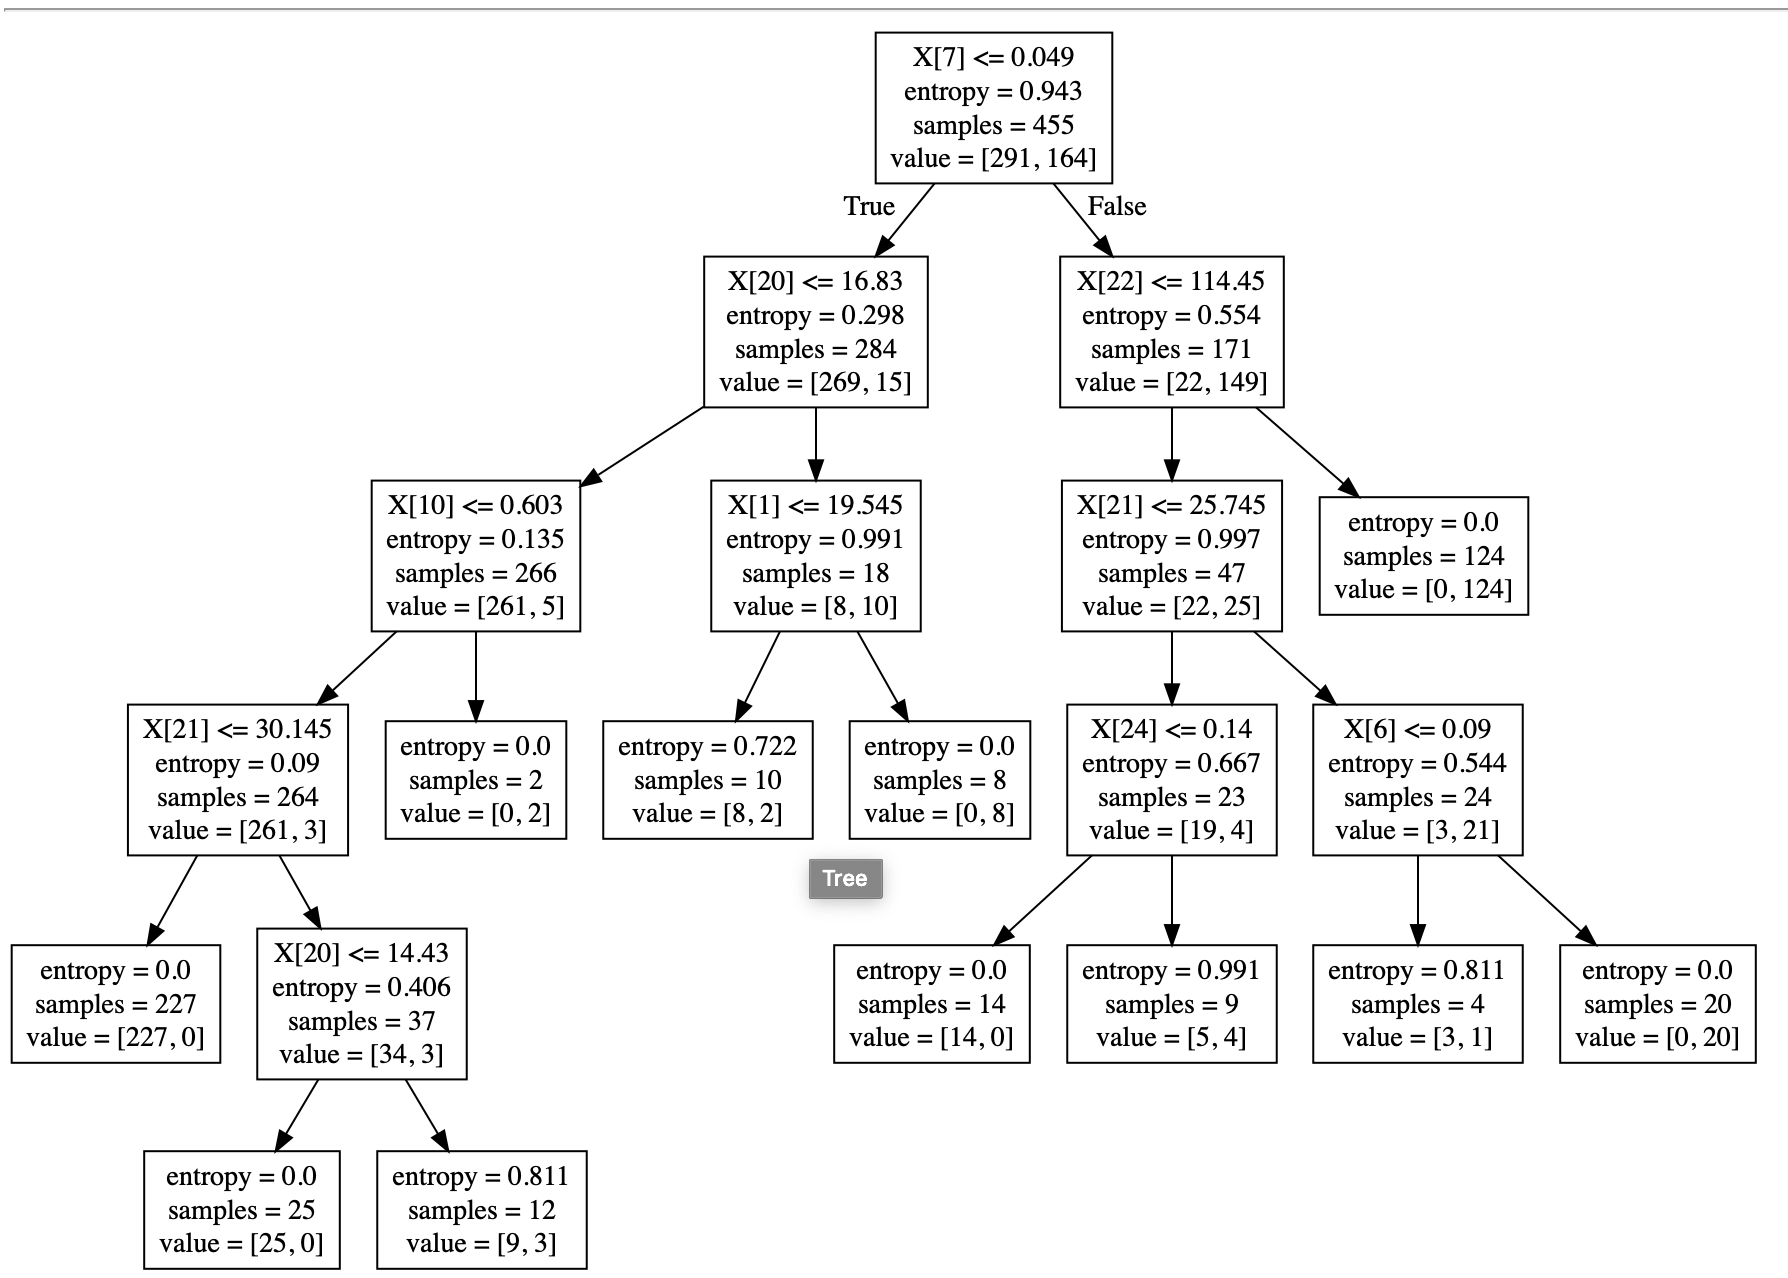

Criteria: Entropy
Tree classifier confusion matrix


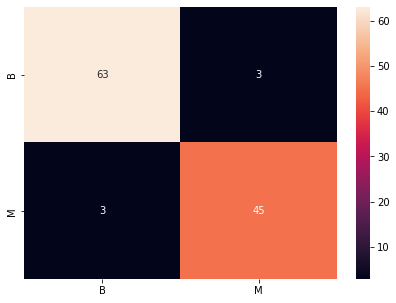

AUC: 0.9460227272727274
Accuracy: 0.9473684210526315


In [62]:
## Model summary - ent
best_ent_pred = clf2_ent_best.predict(x_test)
best_ent_accuracy = clf2_ent_best.score(x_test,y_test)
best_ent_cm = confusion_matrix(y_test,best_ent_pred)
fprg, tprg, thg = roc_curve(y_test,best_ent_pred)
best_ent_auc = roc_auc_score(y_test,best_ent_pred)

print('Criteria: Entropy')
print ('Tree classifier confusion matrix')
index = ['B','M']  
columns = ['B','M']    
cm_ent = pd.DataFrame(best_ent_cm,columns,index)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))
sns.heatmap(cm_ent,annot=True,fmt='g')
show()    
print ('AUC:',best_ent_auc)
print ('Accuracy:',best_ent_accuracy)

### Conclusion

While both Gini based and Entropy based trees have same max-depth of 5, Gini based tree has lower min_samples_split of 4 vs 16 of Entropy tree, and subsequently more leaf nodes with Gini=0.0 (12) vs the 7 nodes with Entropy = 0.0 in the other tree.

In terms of AUC and accuracy, Gini tree (Accuracy:0.9561, AUC:0.9507) performs marginally better than the Entropy tree (Accuracy: 0.9473, AUC: 0.9460)

## Question 4: Bayes Optimal Classification (5 pts)

1. Consider the following classification problem with only one input feature. We have two biased coins, coin 1 and 2. For coin 1, $P(heads) = p$ and for coin 2, $P(heads) = q$. We know that $p > q$. Given the output of a coin toss, we have to predict which coin was used for this toss. Assume we select both the coins for tossing with equal probability. What is the Bayes optimal classifier and what is its error rate?

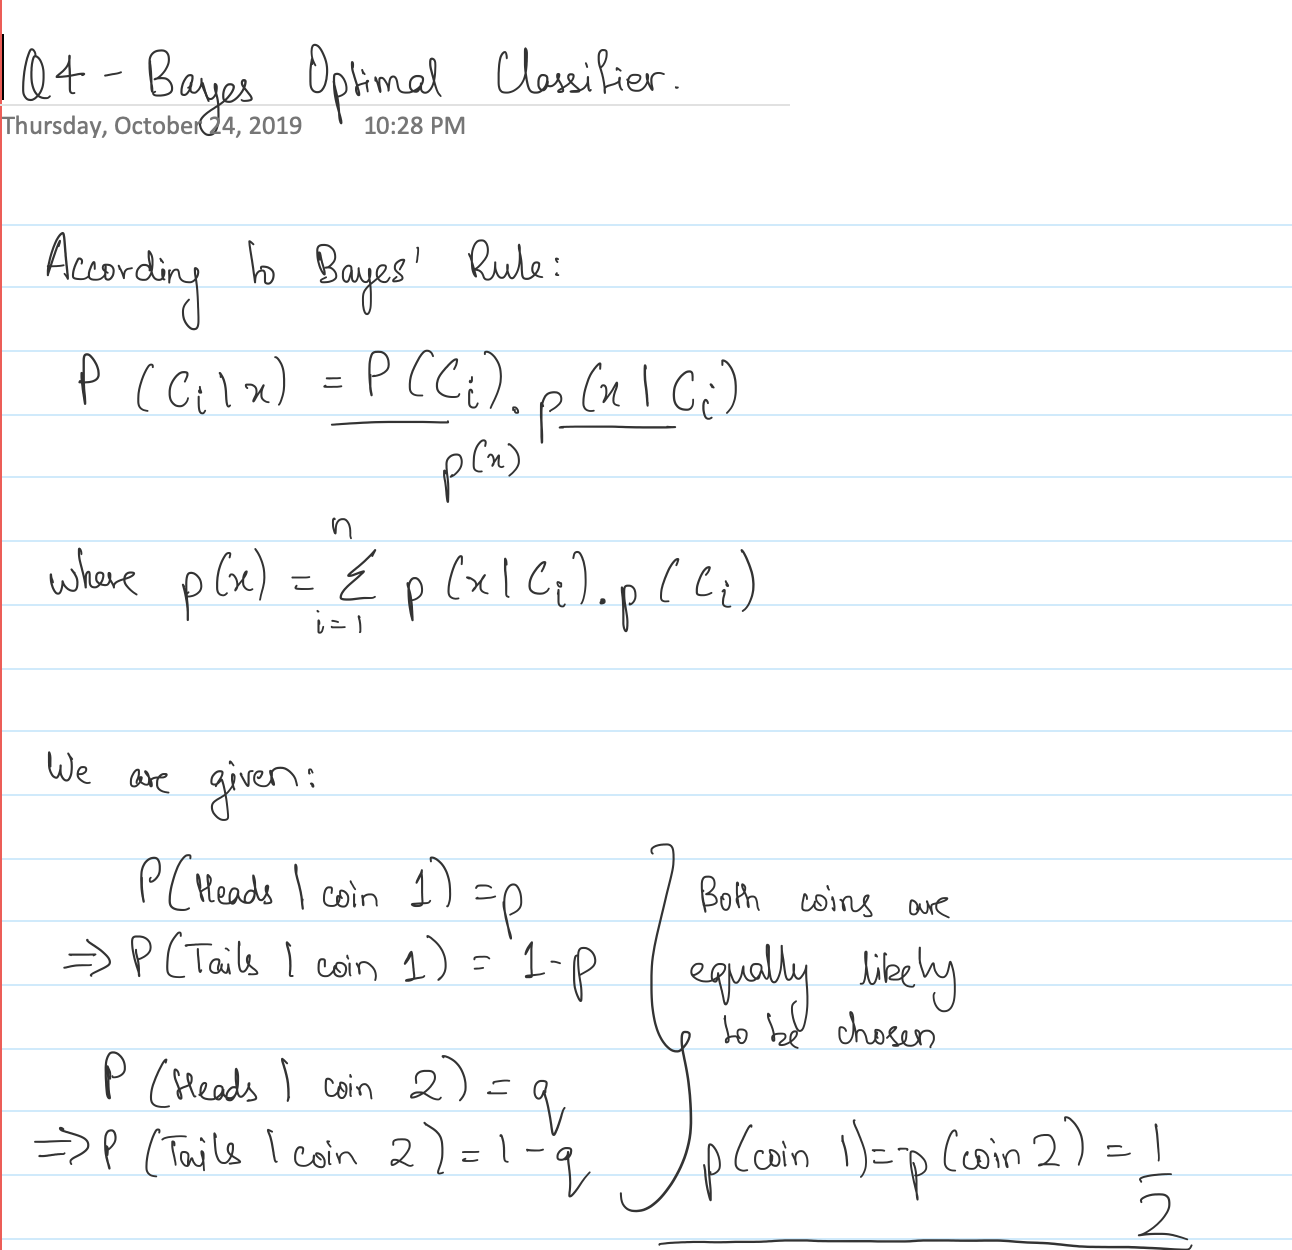
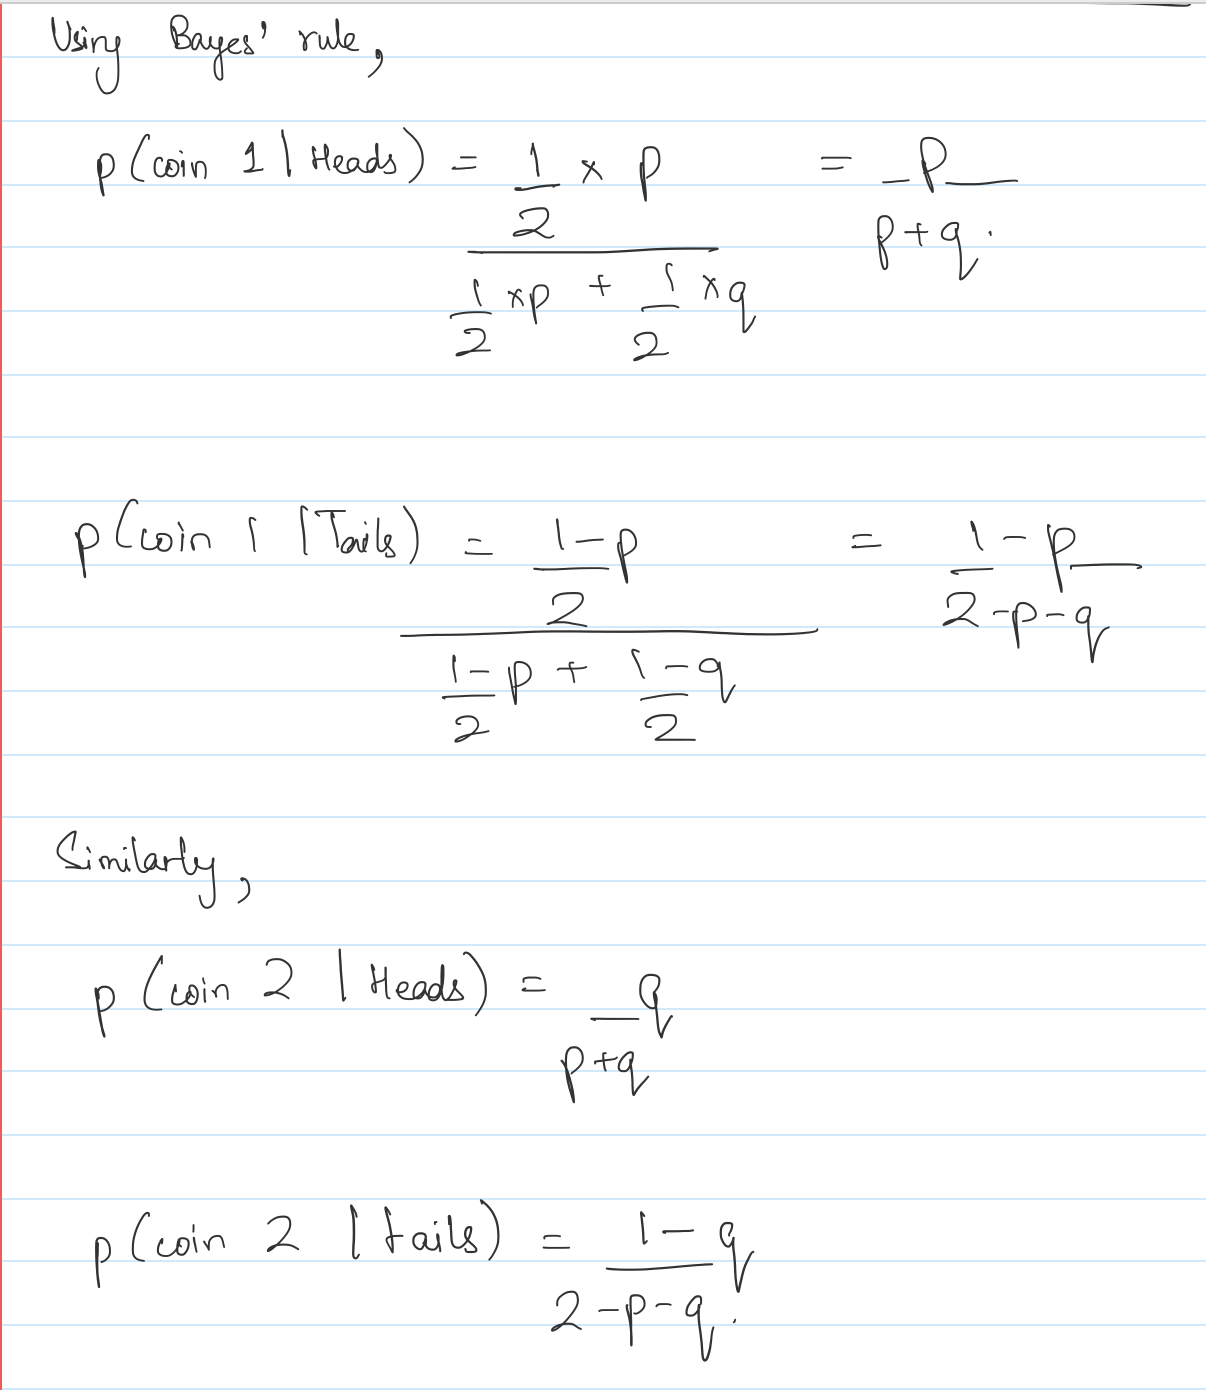
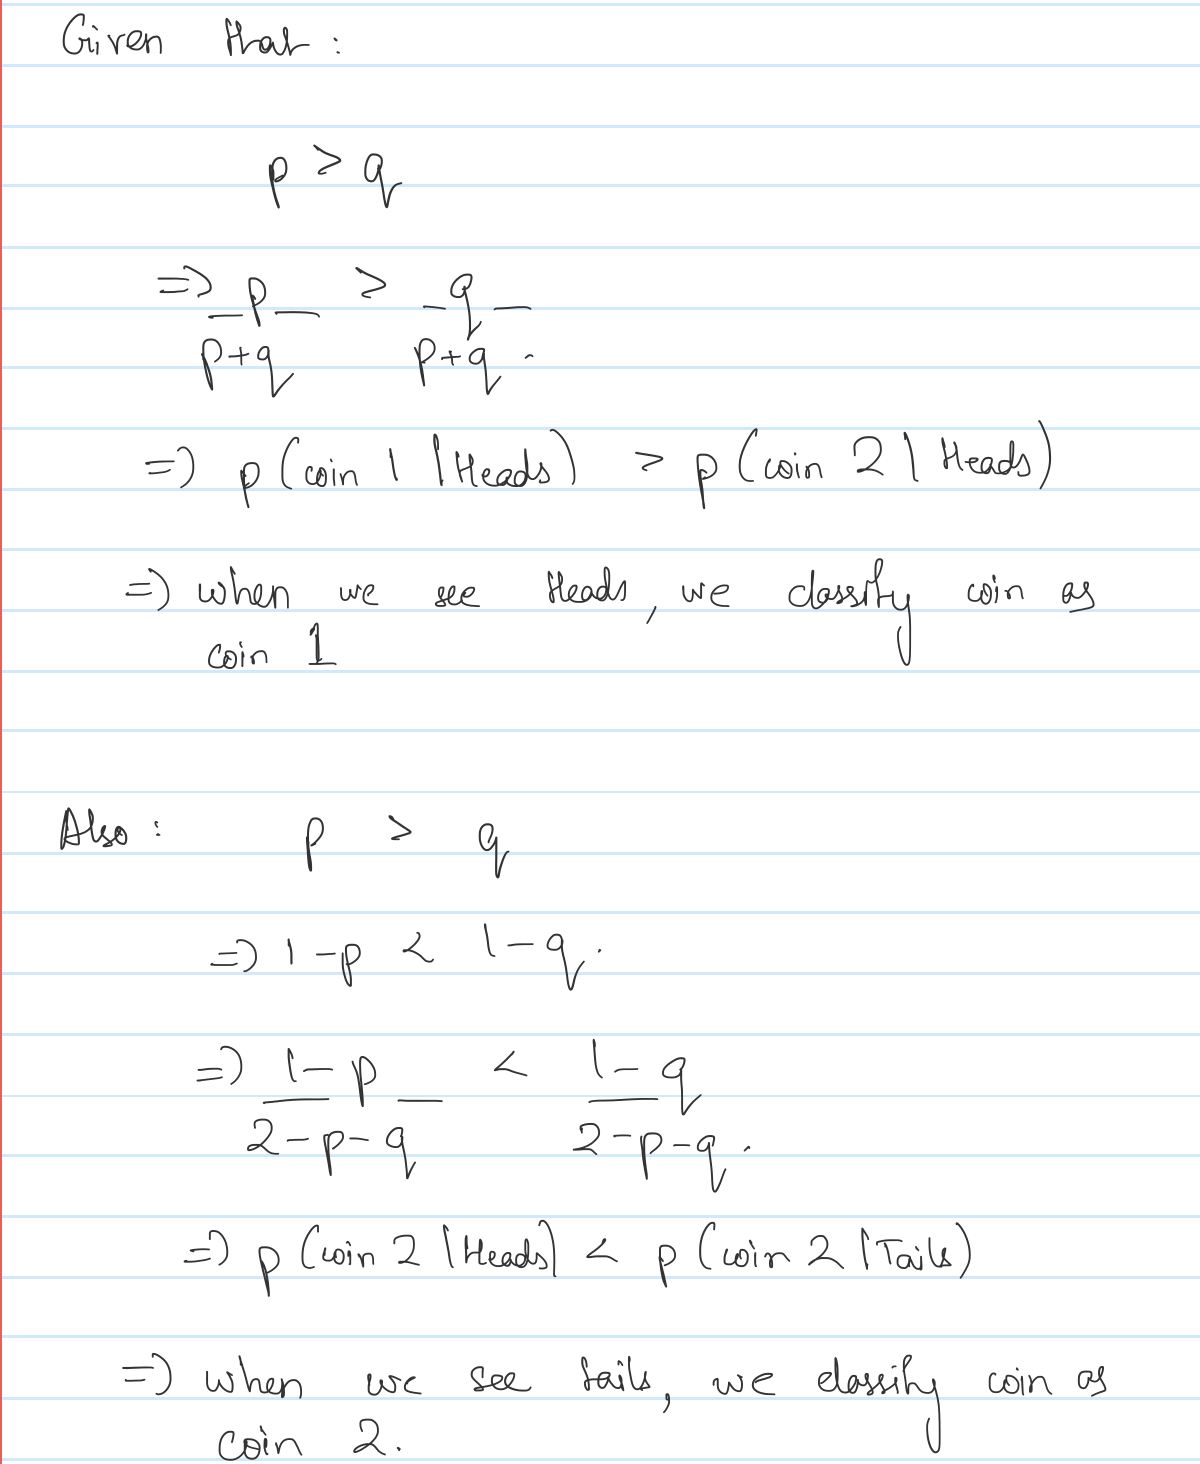
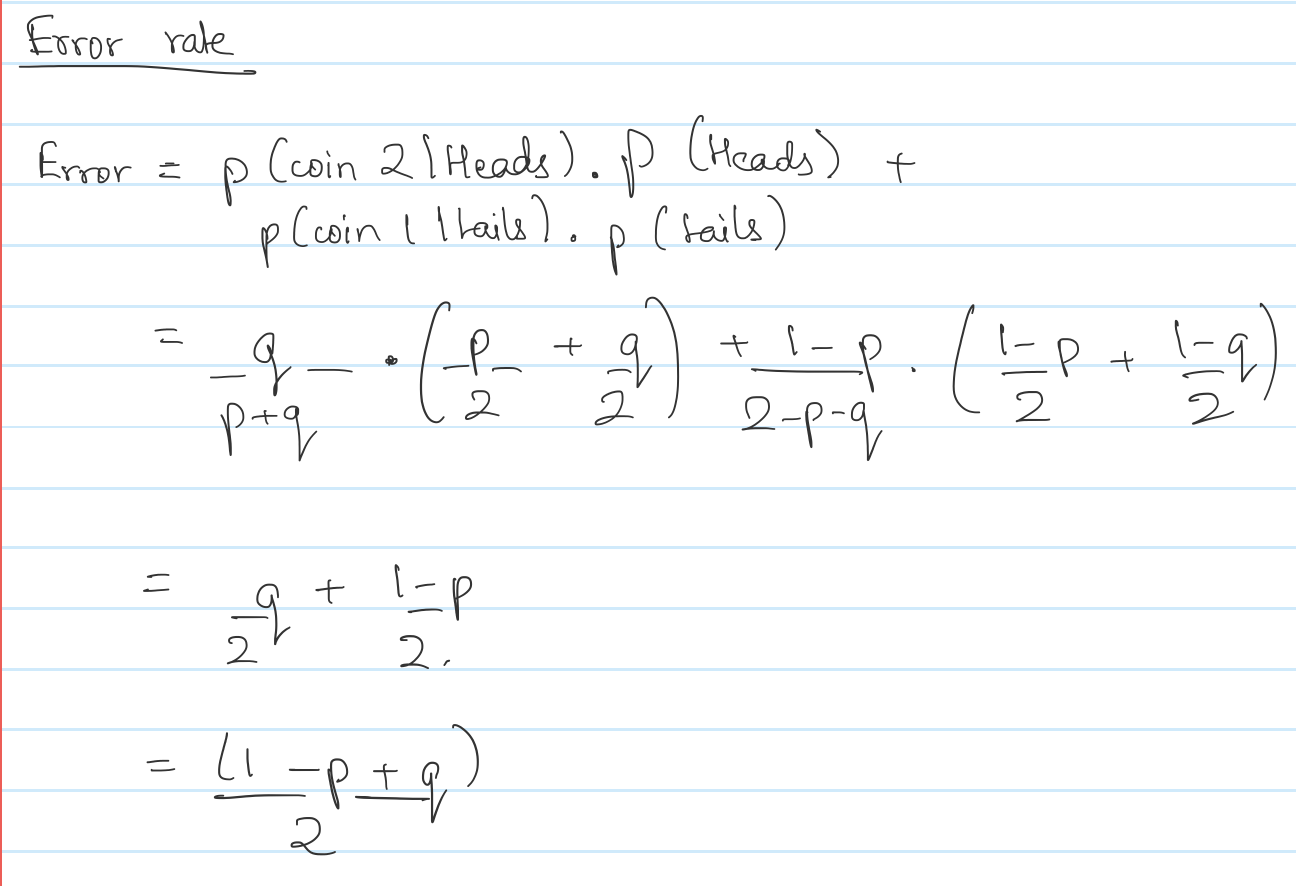